# 📝 Übung zur Datenvisualisierung mit Pandas und Matplotlib -Lösung

(plotten-loesung)=
## Aufgabe: Mit Datenvisualisierungen vertraut machen

Experimentieren Sie mit verschiedenen Gestaltungsmöglichkeiten einer Balkendiagramm-Visualisierung in Matplotlib und Seaborn, um ein besseres Verständnis für die Anpassung und Konfiguration von Diagrammen zu entwickeln.

**1. Farbpalette ändern:** Konsultieren Sie die Dokumentation von [Seaborns Farbpaletten](https://seaborn.pydata.org/tutorial/color_palettes.html) und wählen Sie eine andere Palette aus. Wenden Sie diese auf Ihr Balkendiagramm an.

**2. Kontext und Skalierung anpassen:** Spielen Sie mit unterschiedlichen [Kontexten](https://seaborn.pydata.org/generated/seaborn.set_context.html) wie `notebook`, `talk` und `poster` herum. Ändern Sie auch die Skalierung der Schriftgröße, um die Auswirkungen auf die Visualisierung zu beobachten.

**3. Titel und Achsenbeschriftungen:** Ändern Sie den Titel des Diagramms und die Beschriftungen der Achsen. Probieren Sie verschiedene Schriftgrößen aus.

**4. Achsenkonfiguration:** Modifizieren Sie die [`.xticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) und [`.yticks`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html) Anweisungen, um andere Schriftgrößen und Drehwinkel zu testen. Setzen Sie verschiedene Wertebereiche für die Y-Achse mit [`.ylim`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html), um zu sehen, wie sich dies auf die Darstellung der Daten auswirkt.

**5. Rasterlinien (Grid):** Schalten Sie das Raster ein und aus und fügen Sie es spezifisch für die X- oder Y-Achse hinzu. Passen Sie die Stil- und Farboptionen des Rasters an (siehe dazu die [Matplotlib-Dokumentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)). Für die Konfiguration der Farbe, werden in der Regel HTML-Codes verwendet, nutzen Sie entsprechend gerne einen [HTML Color Picker](https://www.w3schools.com/colors/colors_picker.asp).

Nützliche Ressourcen (neben den Verlinkungen):
- [Matplotlib User Guide](https://matplotlib.org/stable/users/index.html)
- [Seaborn User guide and tutorial](https://seaborn.pydata.org/tutorial.html)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn-Stil anstelle von Matplotlib
sns.set_theme(style="whitegrid")

# Anweisung speziell für Jupyter Notebooks: 
# Anzeige der Matplotlib-Grafiken direkt im Notebook statt in einem neuen Fenster
%matplotlib inline  

In [2]:
# Erzeugung von Beispieldaten: Wahl zum 1. Deutschen Bundestag am 14. August 1949

votes_dict = {'Parteien':['SPD', 'CDU', 'FDP', 'CSU', 
                        'KPD', 'Parteilose', 'BP', 'DP', 
                        'Zentrum', 'Sonstige'],
                'Stimmen':[6934975, 5978636, 2829920, 1380448,
                           1361706, 1141647, 986478, 939934, 
                           727505, 1451149],
                'Prozent': [29.2, 25.2, 11.9, 5.8, 5.7, 
                            4.8, 4.2, 4.0, 3.1, 6.1],
                'color': ['red', 'black', 'yellow', 'darkblue', 
                          'darkred', 'orange', 'blue', 'grey',
                          'darkgrey', 'darkorange']
             }

df_vote = pd.DataFrame(votes_dict,                                   # Übergabe der Daten
                          columns=['Stimmen', 'Prozent', 'color'],   # Spezifikation der Spalten
                          index=votes_dict['Parteien'])              # Spezifikation des Index
df_vote

,Stimmen,Prozent,color
SPD,6934975,29.2,red
CDU,5978636,25.2,black
FDP,2829920,11.9,yellow
CSU,1380448,5.8,darkblue
KPD,1361706,5.7,darkred
Parteilose,1141647,4.8,orange
BP,986478,4.2,blue
DP,939934,4.0,grey
Zentrum,727505,3.1,darkgrey
Sonstige,1451149,6.1,darkorange


Der zu modifizierende Code:

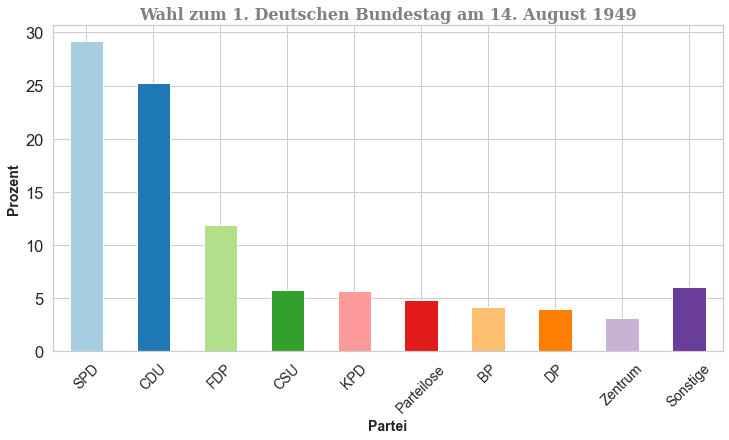

In [3]:
# Diesen Code gerne beliebig anpassen oder in eine andere Codezelle kopieren

colors = sns.color_palette('Paired', 12) 
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})   

fig, ax = plt.subplots(figsize=(12,6))

df_vote.loc[:, 'Prozent'].plot(kind='bar', 
                               color=colors, # oder: df_vote.loc[:, 'color'],
                               ax=ax)

# Formatierung der Überschrift des Diagramms
ax.set_title(label='Wahl zum 1. Deutschen Bundestag am 14. August 1949',
             family='serif',
             color='grey',
             weight='semibold',
             size=16
             )

# Formatierung und Beschriftung von x-Achse und y-Achse
ax.set_xlabel('Partei',
              weight='bold',
              size=14
             )

ax.set_ylabel('Prozent',
              size=14,
              weight='bold',
             )

# Beschriftung der Labelnamen vergrößern und rotieren
ax.set_xticklabels(df_vote.index, 
                   size=14,
                   rotation=45)

# Zeichnen nur der Gitterlinien der y-Achse
ax.yaxis.grid(True)

plt.show()

In [4]:
# weitere Codezellen nach Bedarf einfügen

## Aufgabe: Visualisierung der häufigsten Redner:innen

Erstellen Sie analog zur Visualisierung der Reden pro Jahr ein Balkendiagramm, das die Anzahl der Reden der 15 häufigsten Redner:innen visualisiert. Sie können den Code weitestgehend übernehmen und an den Stellen anpassen, wo es nötig ist. Überlegen Sie aber, was Sie tun müssen, um nur die 15 Redner:innen mit den meisten Reden zu visualisieren.

---

Für die folgenden Aufgaben nutzen wir einen neuen Datensatz. Es handelt sich hier um Reden der Bundesregierung.
Die Textdaten f sind dem Projekt German Political Speeches Corpus entnommen. Adrien Barbaresi. (2019). German Political Speeches Corpus (Version v4.2019) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.3611246. 

Barbaresi, Adrien (2018). "A corpus of German political speeches from the 21st century", Proceedings of the Eleventh International Conference on Language Resources and Evaluation (LREC 2018), European Language Resources Association (ELRA), pp. 792–797. http://purl.org/corpus/german-speeches (BibTeX entry)


In [5]:
df = pd.read_json('../data/speeches-bundesregierung_bearbeitet.json')

In [6]:
# Gruppieren der Daten nach Jahr und Zählen der Einträge mit der groupby()-Funktion

person_counts = df.groupby(df.loc[:, "person"]).size()
person_counts

person
Angela Merkel                1128
Aydan Özoğuz                    1
Bernd Neumann                 323
Brigitte Sauzay                 1
Brigitte Zypries                1
Béla Anda                       1
Christina Weiss               204
Christine Bergmann              2
Edelgard Bulmahn                3
Frank-Walter Steinmeier         5
Franz Josef Jung                3
Franz Müntefering               4
Friedrich Merz                  1
Gerhard Schröder              417
Hans Bernhard Beus              1
Hans Martin Bury               42
Heidemarie Wieczorek-Zeul       2
Helmut Kohl                   332
Hermann Gröhe                   3
Herta Däubler-Gmelin            1
Hildegard Müller                4
Ilse Aigner                     1
Joachim Gauck                   1
Joschka Fischer                32
Julian Nida-Rümelin            48
Jürgen Trittin                  2
Maria Böhmer                   11
Matthias Platzeck               1
Michael Glos                    1
Michael

In [7]:
# Sortierung
person_counts = person_counts.sort_values(ascending=False)
person_counts

person
Angela Merkel                1128
Gerhard Schröder              417
Helmut Kohl                   332
Bernd Neumann                 323
Monika Grütters               246
Christina Weiss               204
Michael Naumann                64
Julian Nida-Rümelin            48
Thomas de Maizière             45
Hans Martin Bury               42
Joschka Fischer                32
Rolf Schwanitz                 25
Maria Böhmer                   11
k.A.                           10
Frank-Walter Steinmeier         5
Hildegard Müller                4
Otto Graf Lambsdorff            4
Franz Müntefering               4
Hermann Gröhe                   3
Edelgard Bulmahn                3
Franz Josef Jung                3
Jürgen Trittin                  2
Rudolf Scharping                2
Heidemarie Wieczorek-Zeul       2
Peer Steinbrück                 2
Christine Bergmann              2
Roman Herzog                    1
Wolfgang Schäuble               1
Werner Müller                   1
Waldema

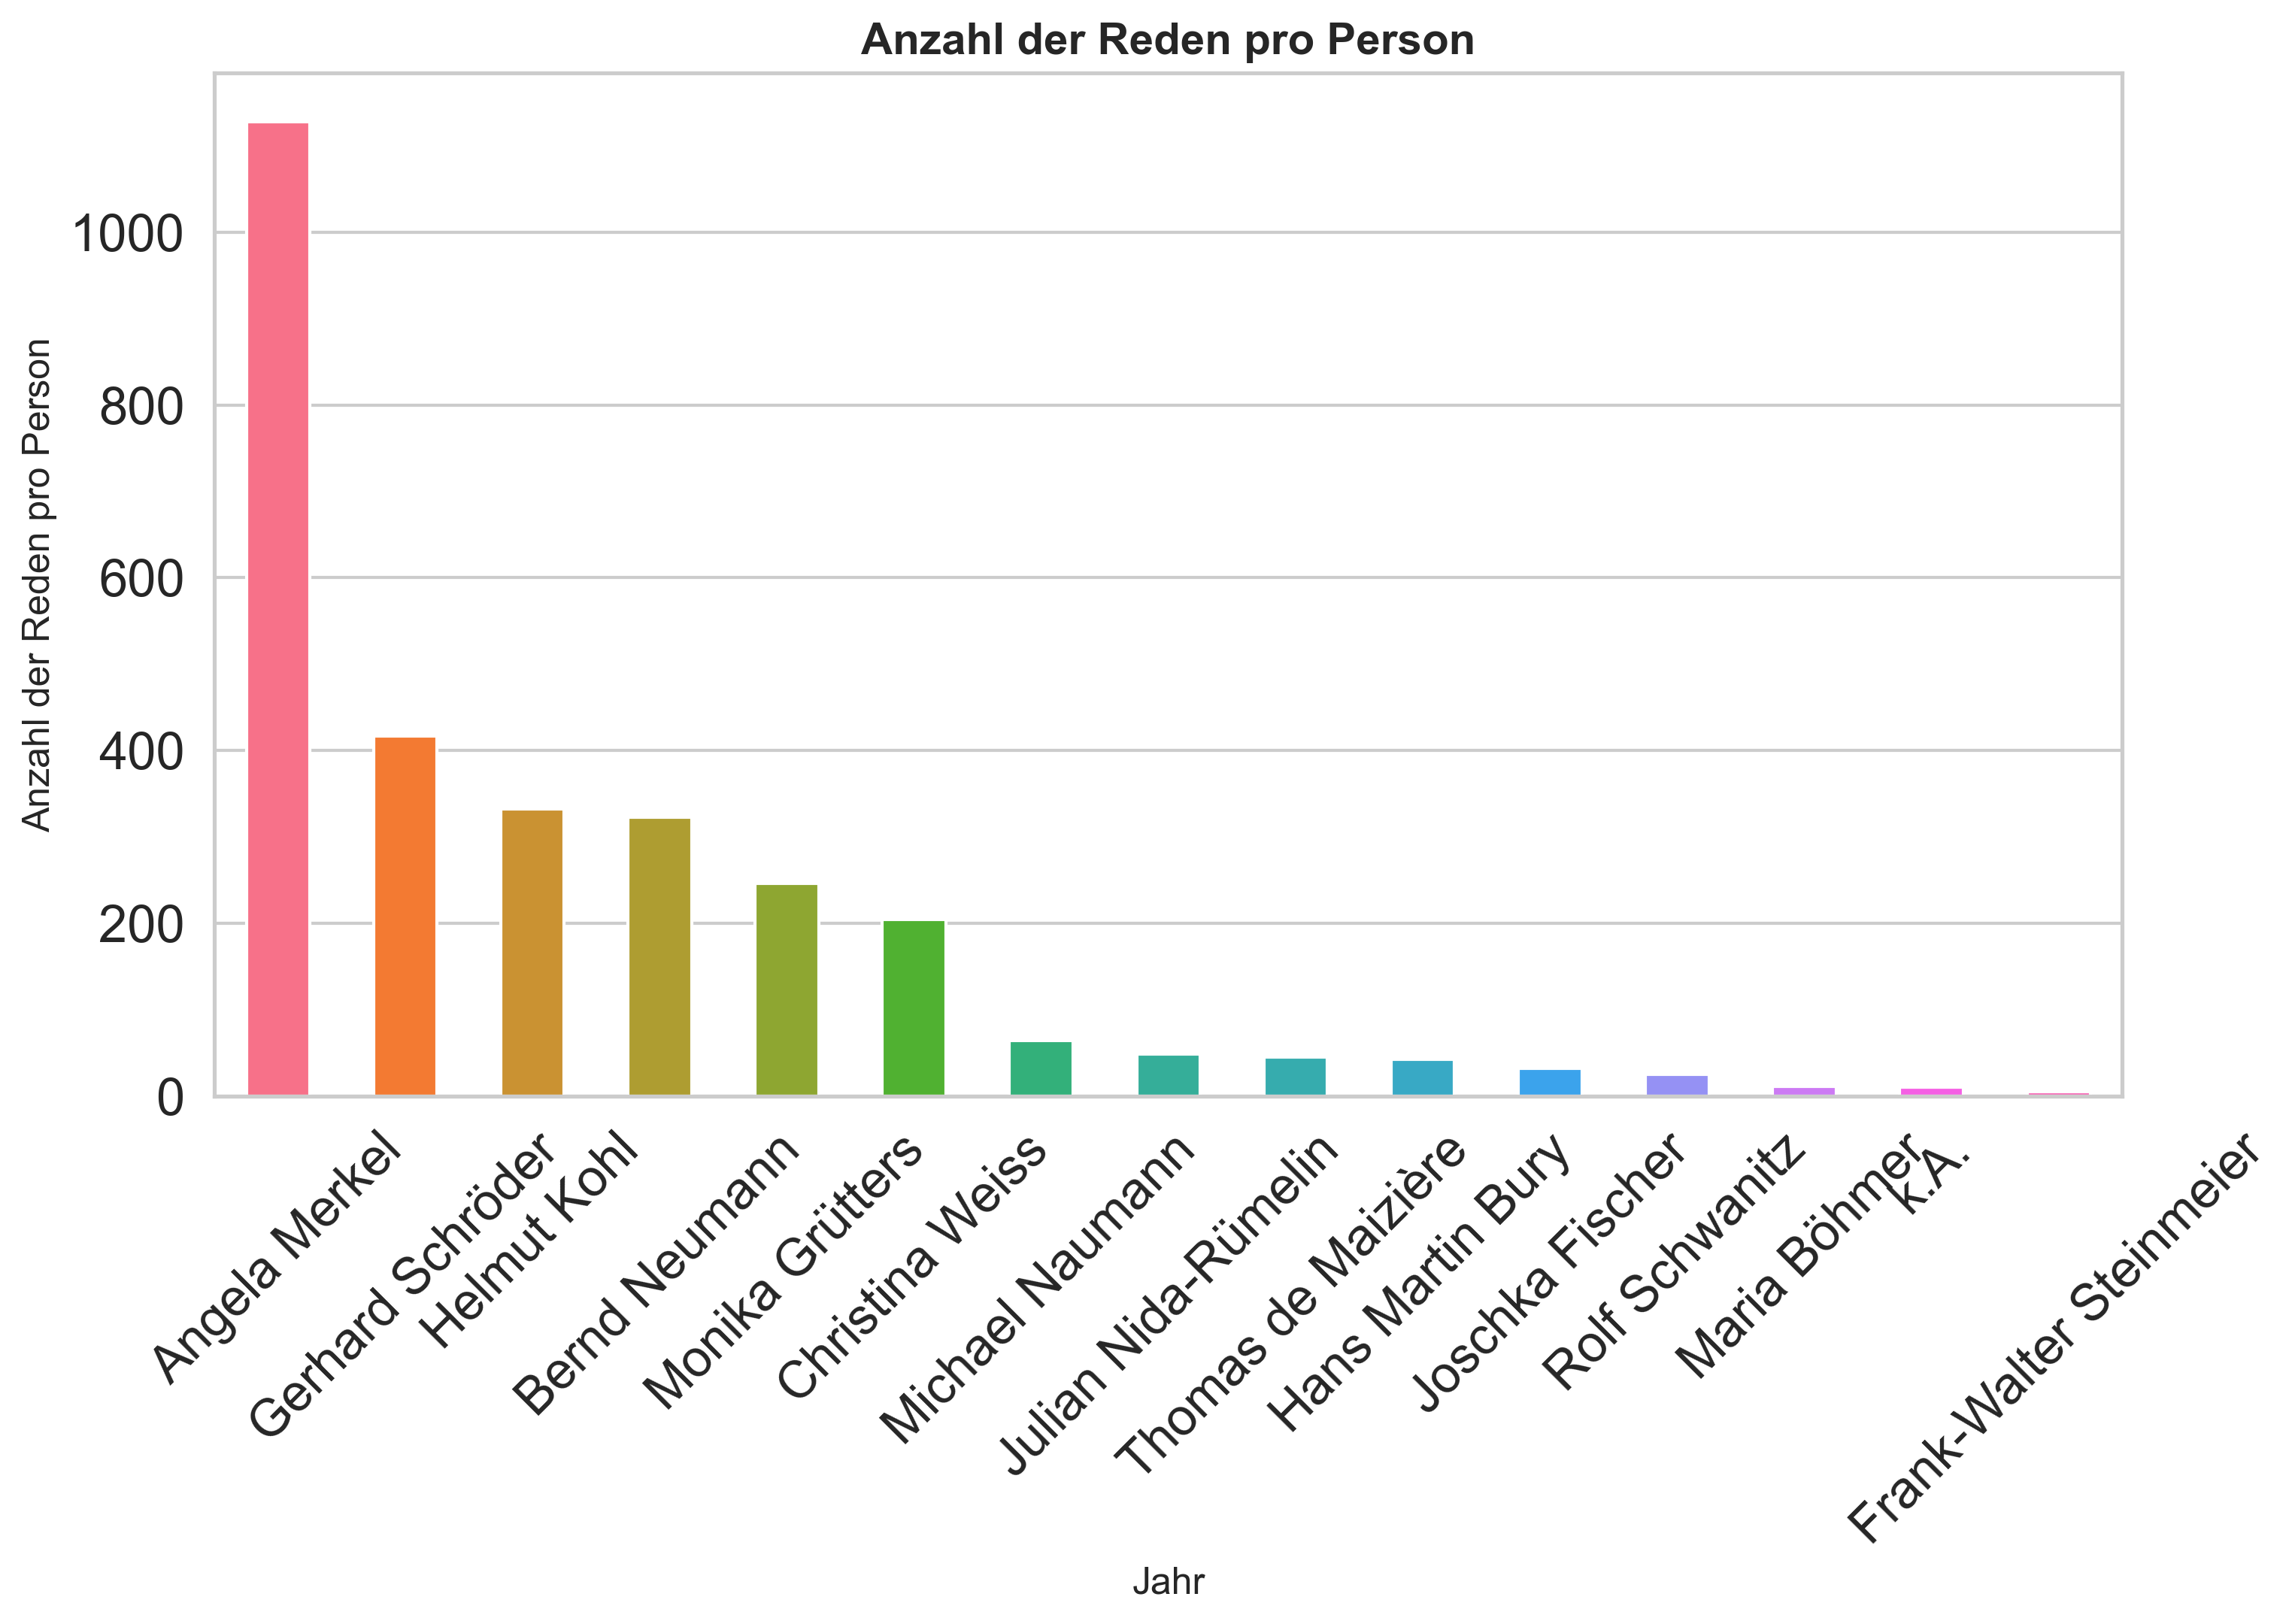

In [8]:
# Basisvisualisierung mit plt
plt.figure(figsize=(10, 7), dpi=300)

# Plotten der Daten
person_counts[:15].plot.bar(color=sns.color_palette("husl", 15))

# Styling des Layouts
plt.title("Anzahl der Reden pro Person", fontweight="semibold", fontsize=14)
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Anzahl der Reden pro Person", fontsize=12)
plt.xticks(rotation=45)
plt.grid(False) 
plt.grid(True, axis="y")  

plt.tight_layout(pad=0)
# plt.savefig('../daten/output/FILENAME.png')
plt.show()

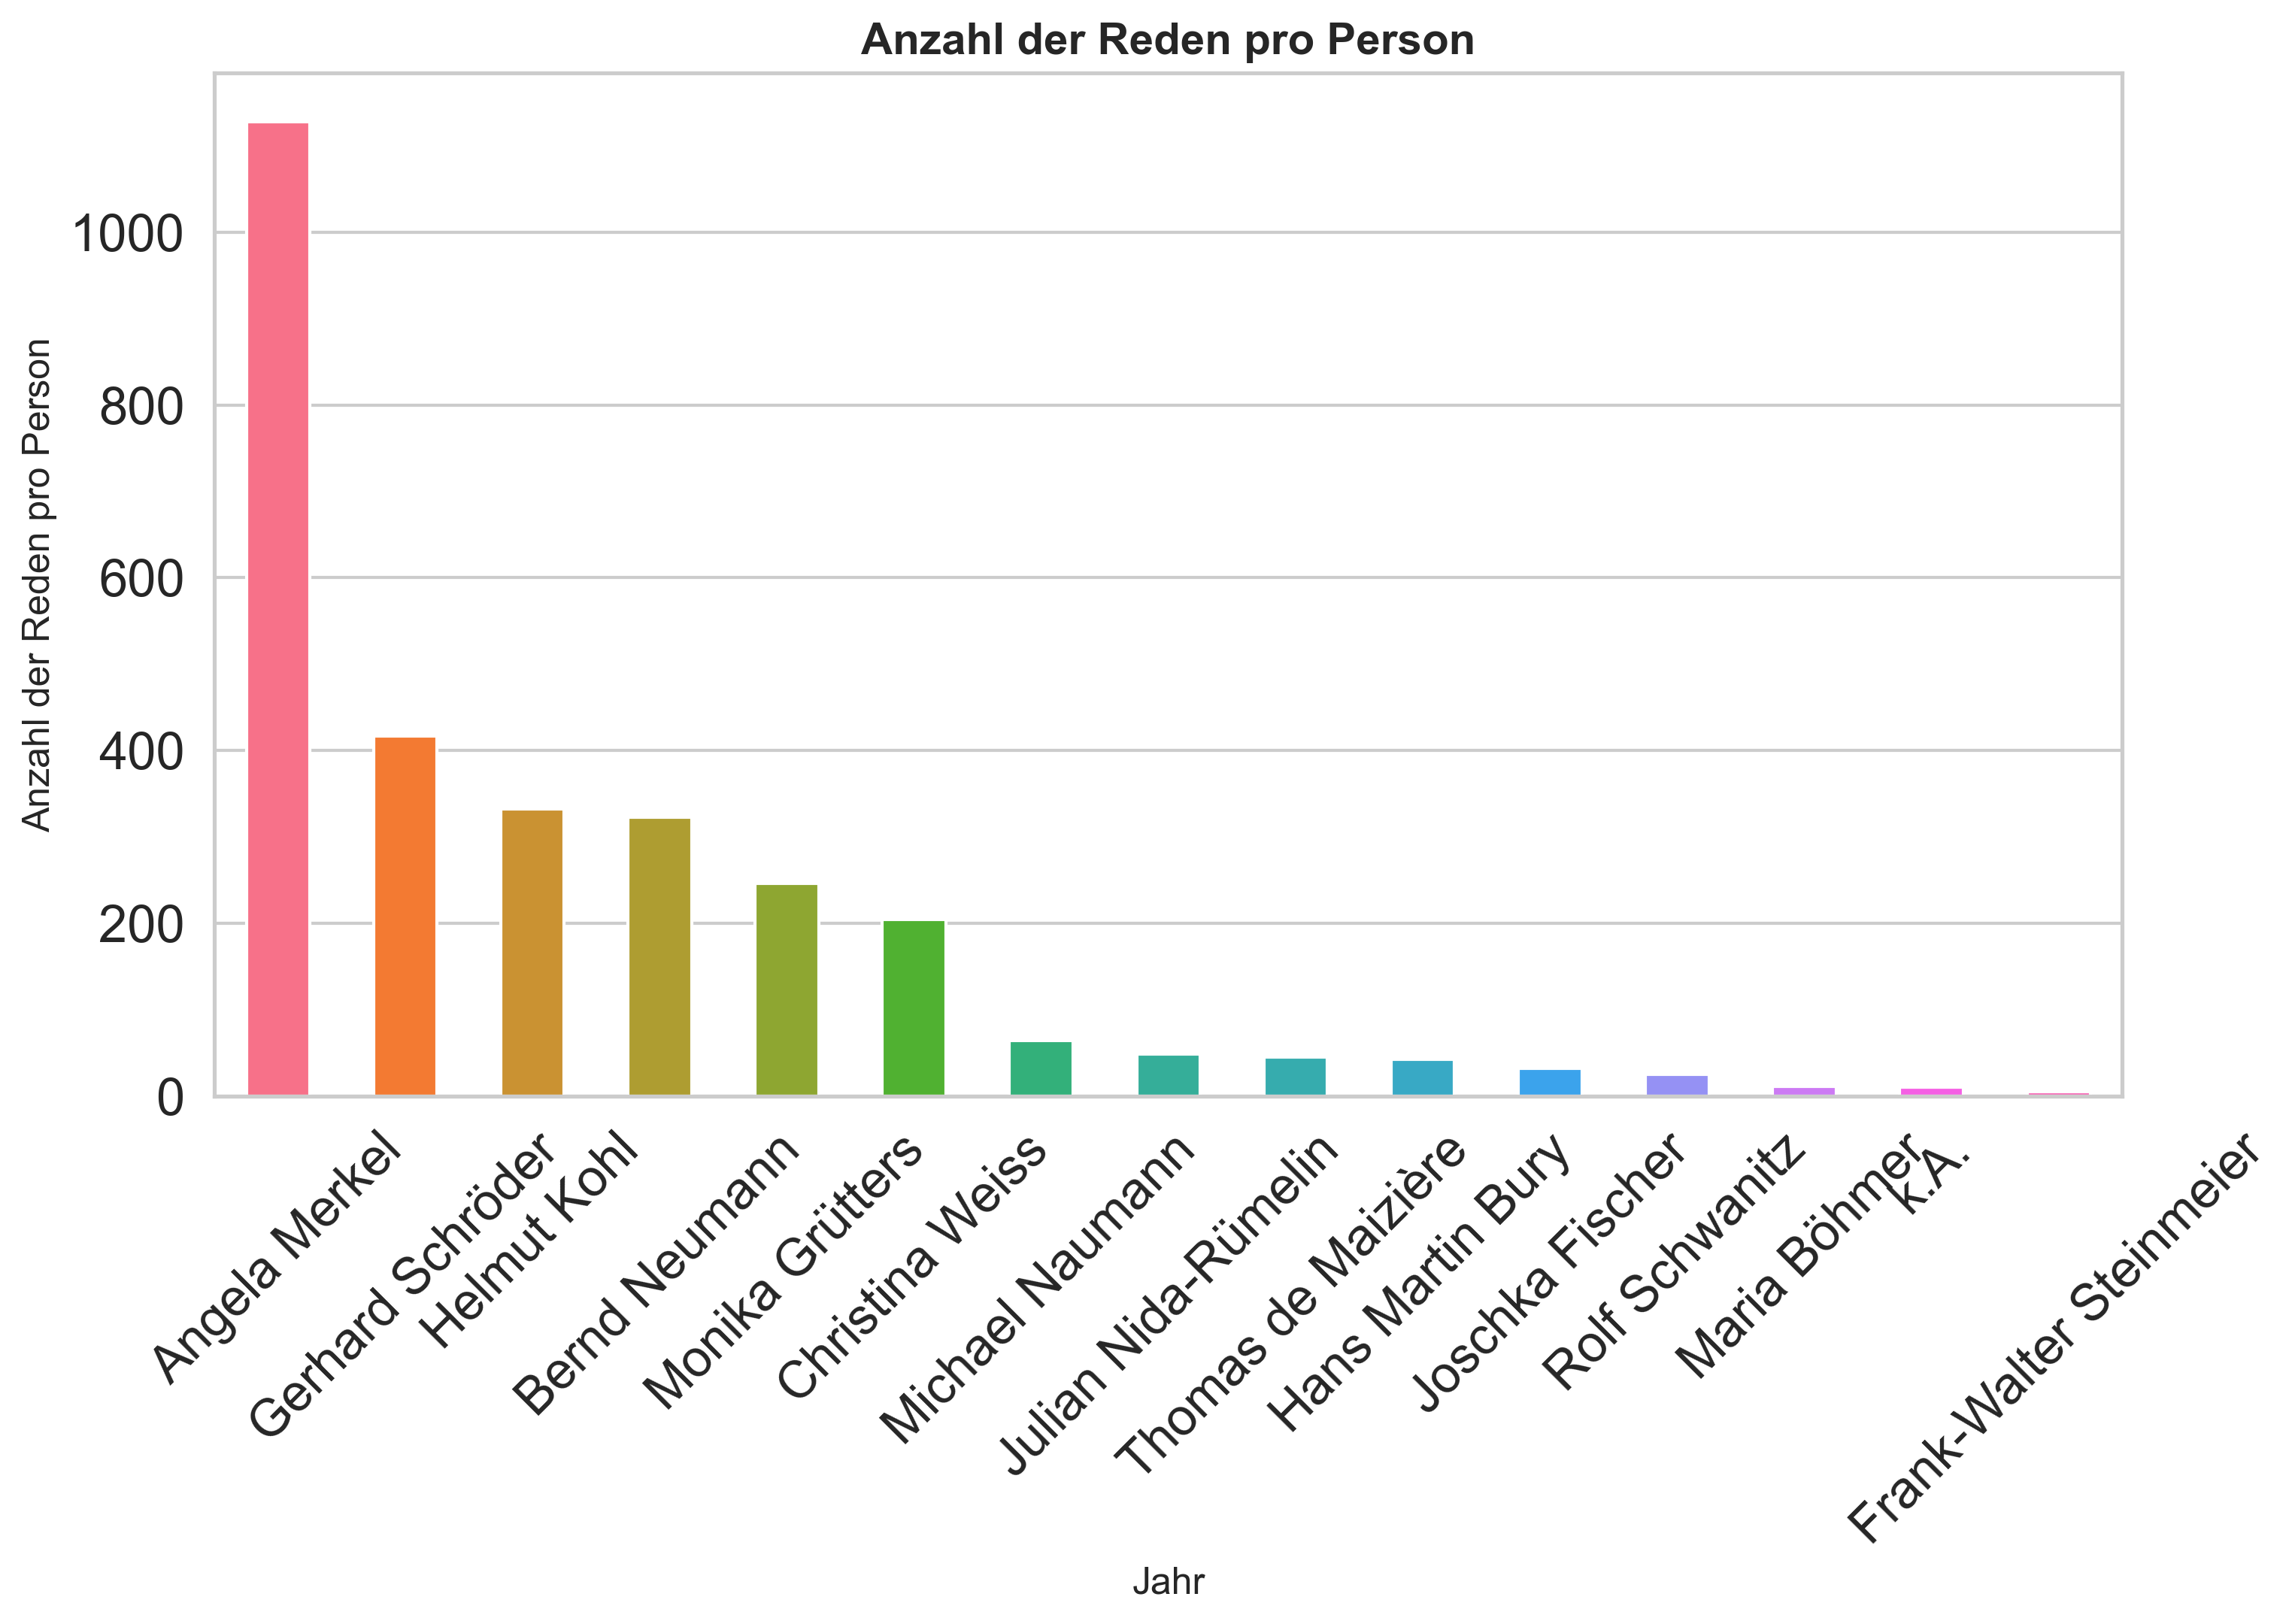

In [9]:
# Basisvisualisierung mit fig, ax

fig, ax = plt.subplots(figsize=(10, 7), dpi=300)

# Plotten der Daten
person_counts[:15].plot(kind='bar',
                        color=sns.color_palette("husl", 15))

# Styling des Layouts
ax.set_title('Anzahl der Reden pro Person', 
             fontweight='semibold',
             fontsize=14)

ax.set_xlabel('Jahr', 
              fontsize=12)
ax.set_ylabel('Anzahl der Reden pro Person', 
              fontsize=12)

ax.set_xticklabels(person_counts[:15].index, rotation=45)

ax.grid(False) 
ax.grid(True, axis='y')  

plt.tight_layout(pad=0)
# plt.savefig('../daten/output/FILENAME.png')
plt.show()

## Aufgabe: Ergebnis von Datenabfragen visualisieren

Visualisieren Sie die *absoluten* und *relativen* Häufigkeiten des Ergebnisses der im Notebook `LC5_pandas-basics.ipynb` gestellten Aufgabe 3.4:

*Suchen Sie nach Reden, ~~die zwischen 2000 und 2010 gehalten wurden,~~ die sich auf Umweltthemen beziehen. In Frage kommen hierfür Begriffe wie "Umwelt", "Klima", "Nachhaltigkeit" oder ähnliches. Formulieren Sie eine Abfrage, die mehrere dieser Begriffe berücksichtigt. Achten Sie ggf. darauf, wie die Bedingungen mit runden Klammern gruppiert werden müssen.*

Die Einschränkung auf den Zeitraum 2000-2010 fällt für diese Aufgabenstellung weg. Was fällt Ihnen bei der Visualisierung der relativen Häufigkeiten auf?


In [10]:
mask = (df.loc[:, "text"].str.contains("Umwelt", case=False)) \
        | (df.loc[:, "text"].str.contains("Klima", case=False)) \
        | (df.loc[:, "text"].str.contains("Nachhaltigkeit", case=False))

df_umwelt = df.loc[mask, :]
print(df_umwelt.shape)
df_umwelt.head()

(1036, 9)


,date,person,address,title,sub_title,place,src_url,text,ntokens
3,2005-03-08,Gerhard Schröder,Herr Ministerpräsident! Lieber Herr Dr. Bernot...,Rede von Bundeskanzler Gerhard Schröder bei de...,Der Kampf gegen die Arbeitslosigkeit ist eine ...,na,http://archiv.bundesregierung.de/bpaexport/red...,"Einen Satz von Ihnen, Herr Dr. Bernotat, habe ...",2515
5,2005-07-14,Christina Weiss,None,Übergabe des Grassi-Museums für Angewandte Kun...,Rund ein Dreivierteljahrhundert nach der Einwe...,na,http://archiv.bundesregierung.de/bpaexport/red...,"ich habe nie einen Hehl daraus gemacht, dass i...",697
19,2000-05-30,Gerhard Schröder,None,Rede von Bundeskanzler Gerhard Schröder anläss...,None,na,http://archiv.bundesregierung.de/bpaexport/red...,()\nEin sehr erfreulicher Anlass führt uns heu...,1175
20,1999-02-01,Michael Naumann,None,Interview von Staatsminister Dr. Michael Nauma...,None,na,http://archiv.bundesregierung.de/bpaexport/red...,Frage: Die neue Bundesregierung will der Kultu...,1174
21,2001-01-03,Julian Nida-Rümelin,None,Staatsminister Nida-Rümelin zur Bio-Ethik: &qu...,None,na,http://archiv.bundesregierung.de/bpaexport/red...,Das britische Parlament hat kürzlich das Klone...,1572


In [11]:
umwelt_counts = df_umwelt.groupby(df_umwelt.loc[: ,"date"].dt.year).size()
umwelt_counts

date
1982     1
1983     4
1984     7
1985     1
1986     3
1987     7
1988     5
1989     4
1990     3
1991    14
1992    10
1993     4
1994     1
1995     8
1996    26
1997    40
1998    28
1999    16
2000    39
2001    61
2002    36
2003    25
2004    31
2005    34
2006    53
2007    87
2008    61
2009    63
2010    49
2011    57
2012    35
2013    38
2014    47
2015    56
2016    42
2017    40
dtype: int64

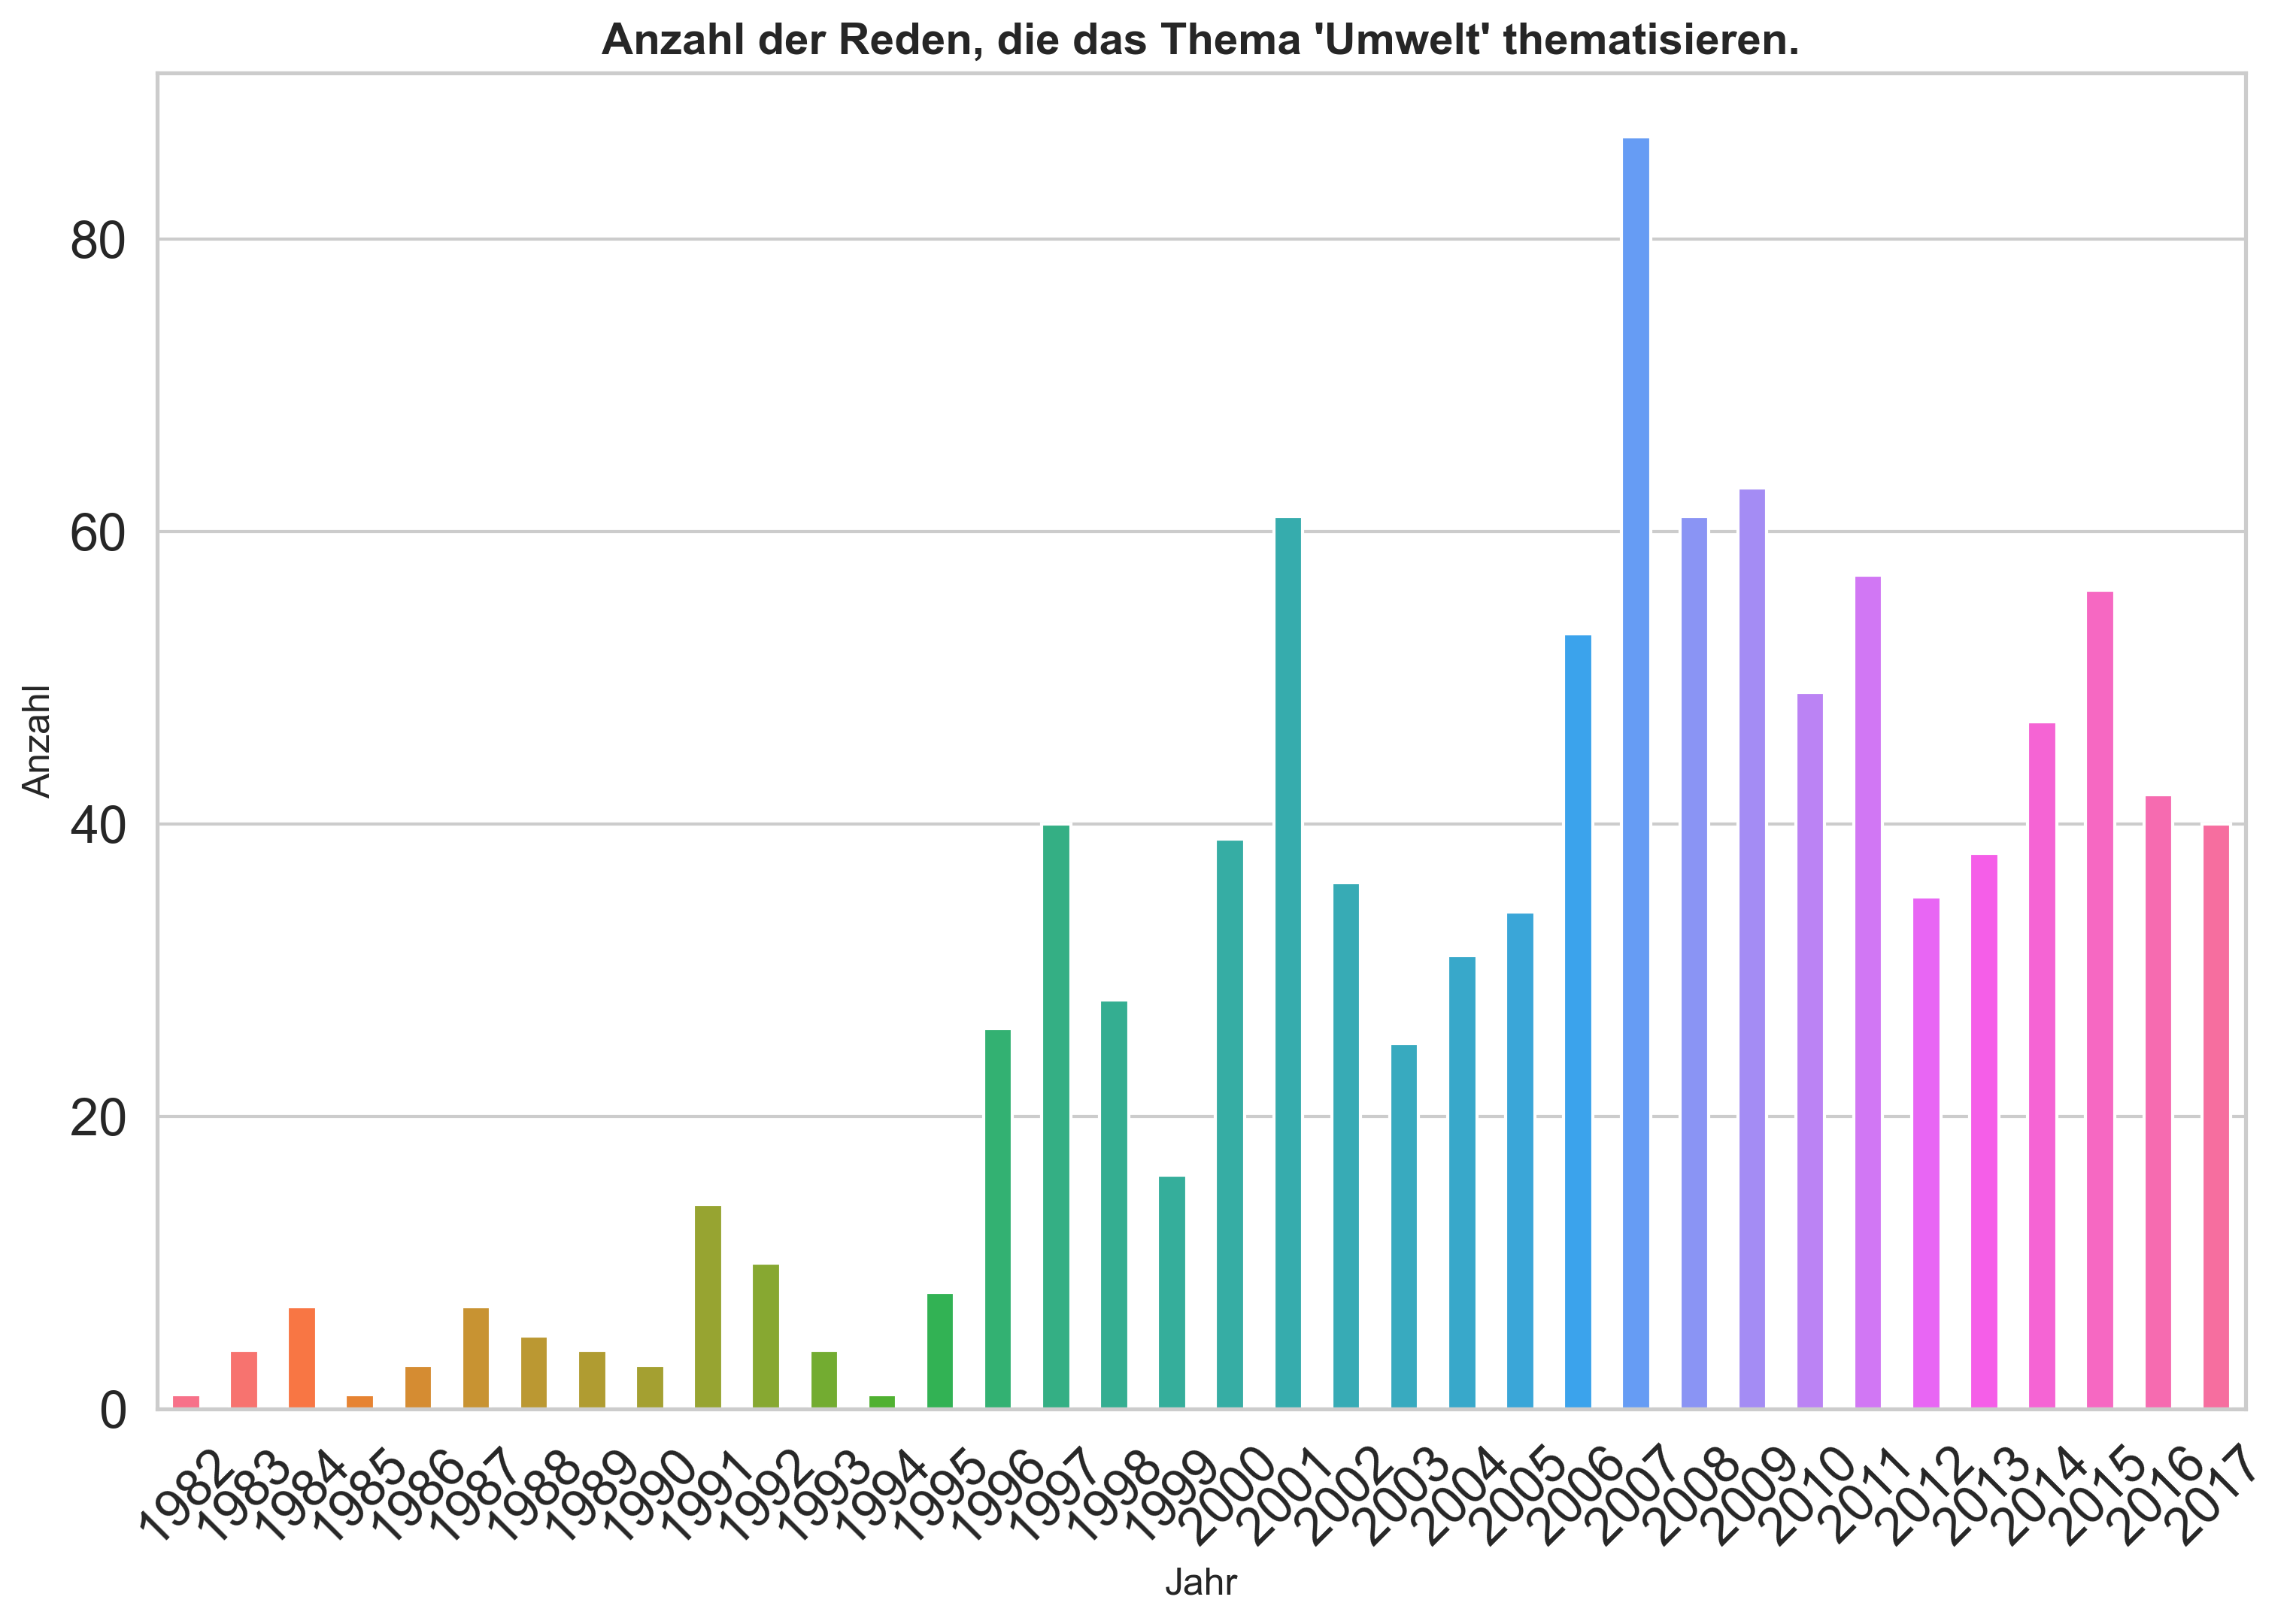

In [12]:
# Basisvisualisierung mit plt
plt.figure(figsize=(10, 7), dpi=300)

# Plotten der Daten
umwelt_counts.plot.bar(color=sns.color_palette("husl", len(umwelt_counts)))

# Styling des Layouts
plt.title("Anzahl der Reden, die das Thema 'Umwelt' thematisieren.", fontweight="semibold", fontsize=14)
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Anzahl", fontsize=12)
plt.xticks(rotation=45)  
plt.grid(False) 
plt.grid(True, axis="y") 

plt.tight_layout(pad=0)
# plt.savefig("../daten/output/FILENAME.png")
plt.show()

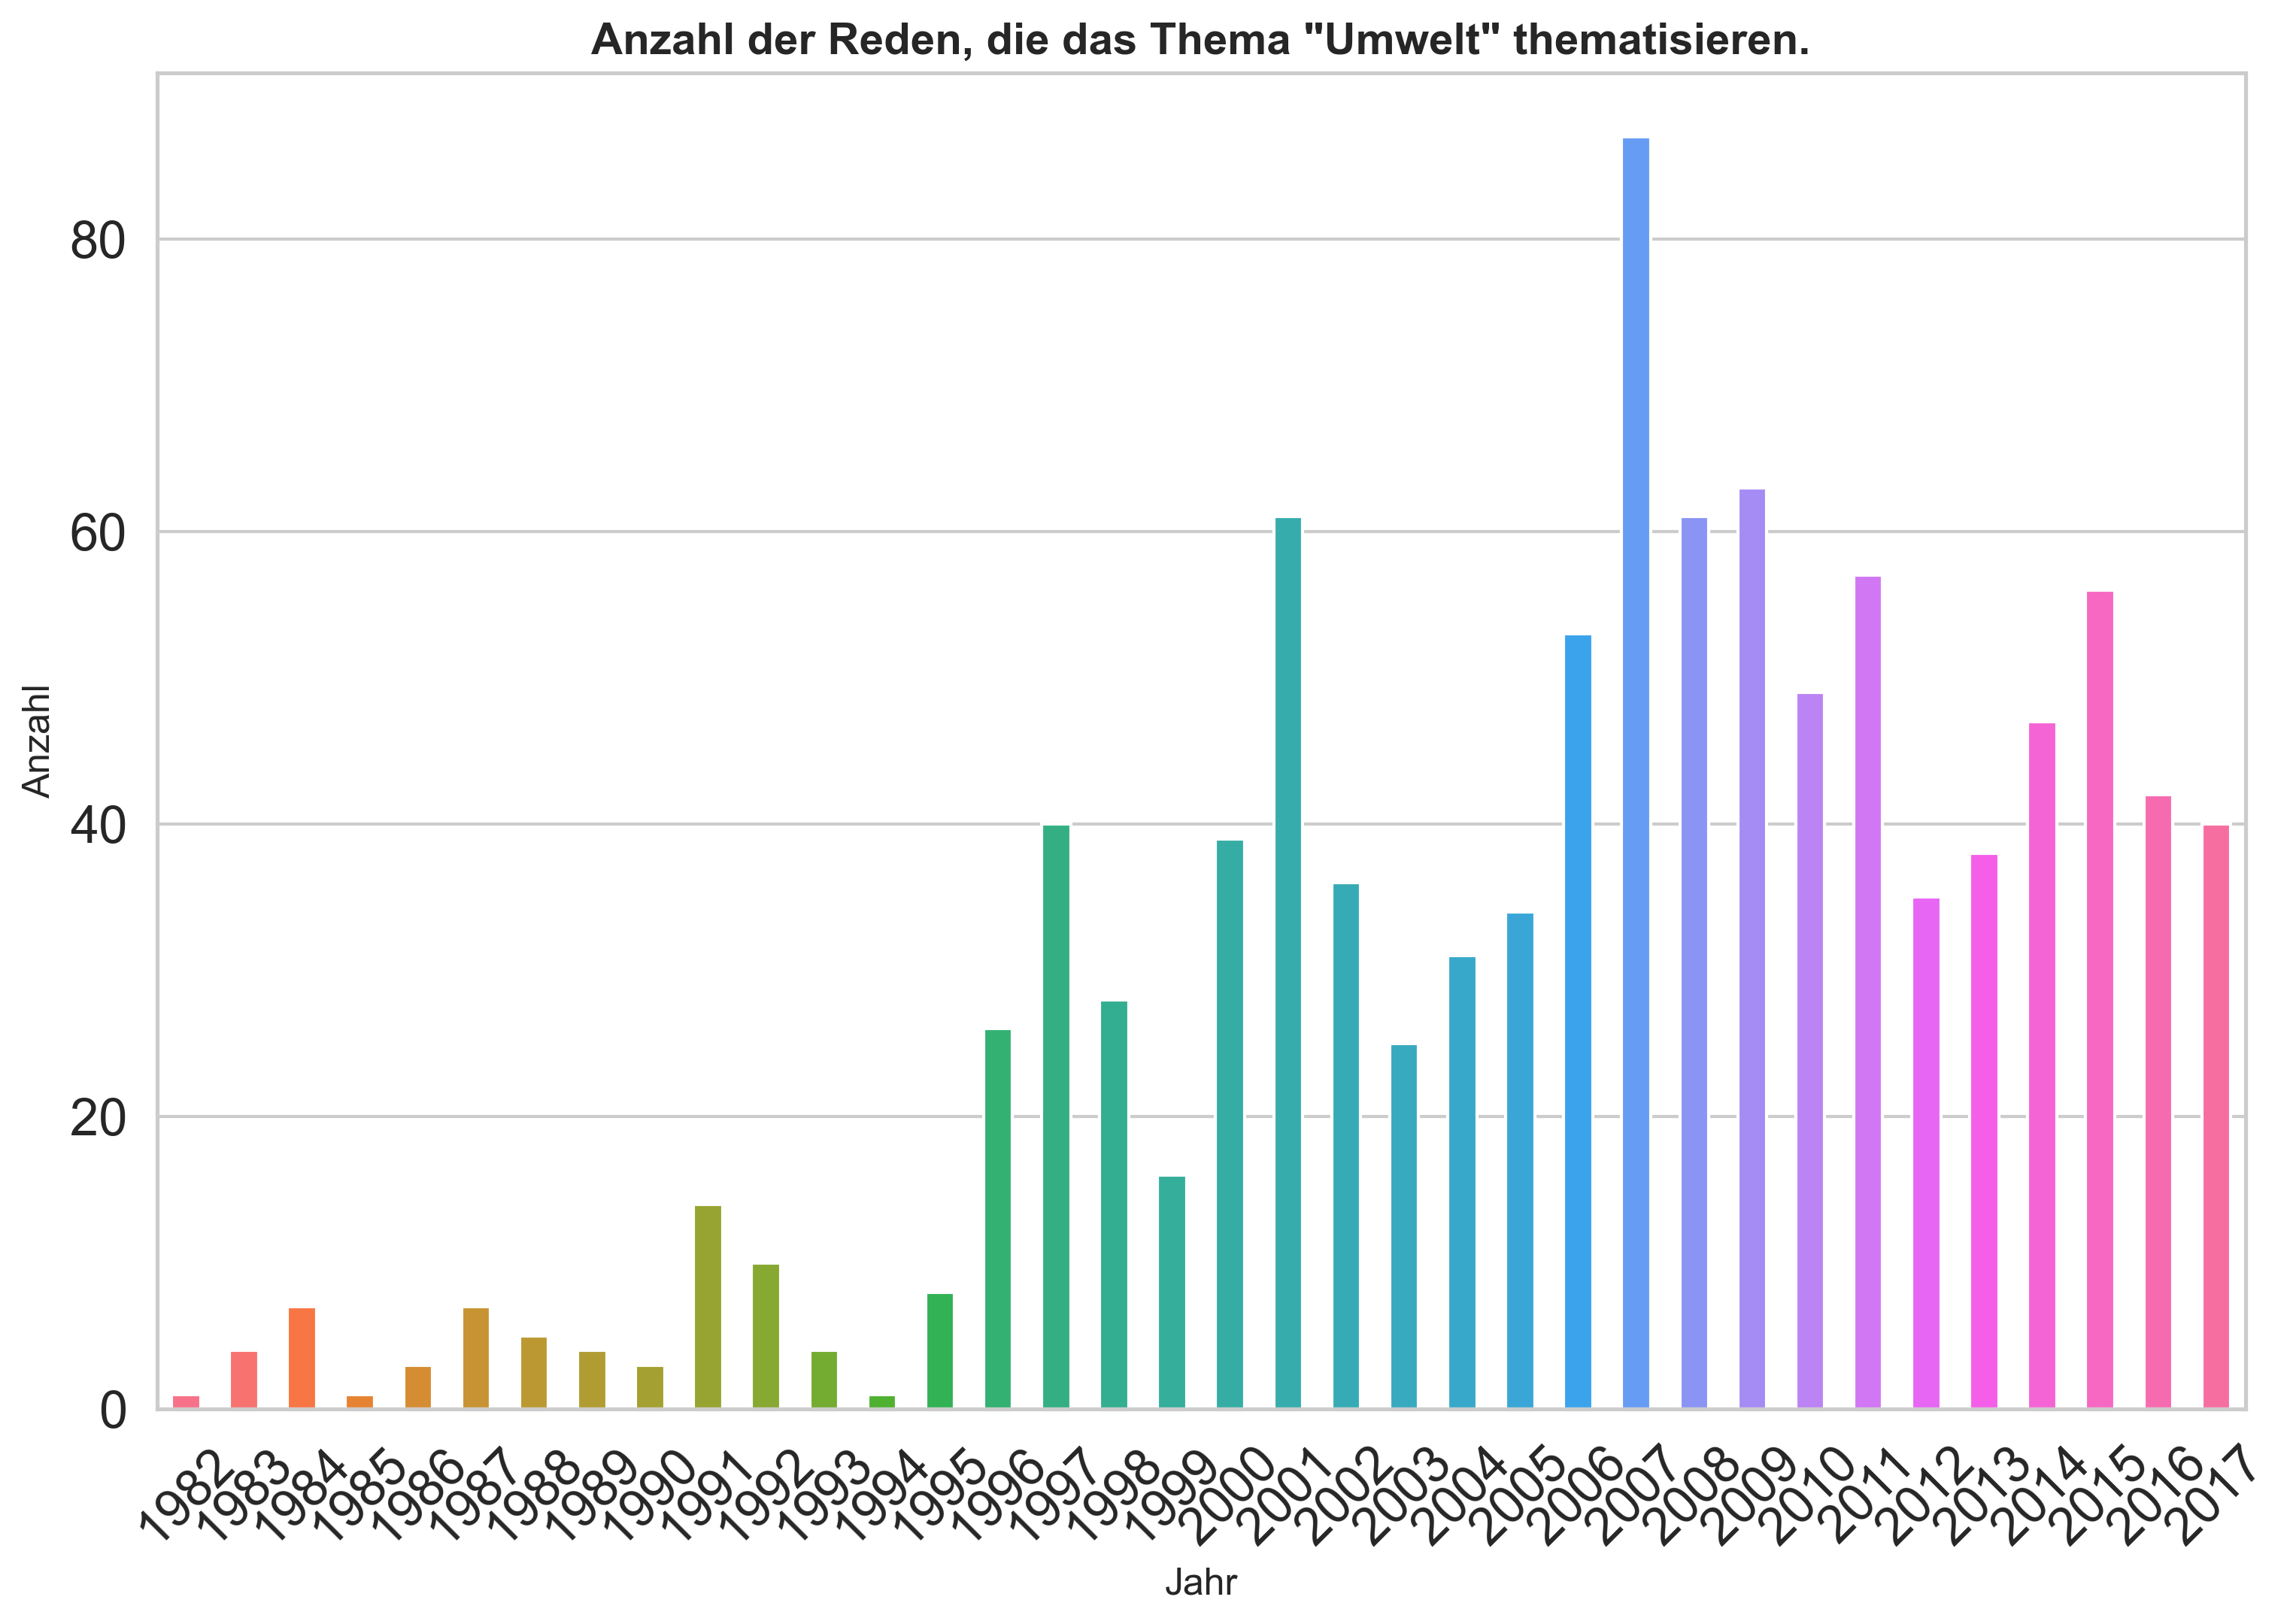

In [13]:
# Basisvisualisierung mit fig, ax
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)

# Plotten der Daten
umwelt_counts.plot(kind='bar',
                   color=sns.color_palette('husl', len(umwelt_counts)))

# Styling des Layouts
ax.set_title('Anzahl der Reden, die das Thema "Umwelt" thematisieren.', 
             fontweight="semibold", 
             fontsize=14)

ax.set_xlabel('Jahr', 
              fontsize=12)
ax.set_ylabel('Anzahl', 
              fontsize=12)

ax.set_xticklabels(umwelt_counts.index, rotation=45) 

ax.grid(False) 
ax.grid(True, axis="y") 

plt.tight_layout(pad=0)
# plt.savefig("../daten/output/FILENAME.png")
plt.show()

In [14]:
# Gruppieren der Daten nach Jahr und Zählen der Einträge mit der groupby()-Funktion

year_counts = df.groupby(df.loc[:, 'date'].dt.year).size()
year_counts

date
1982      2
1983     14
1984     13
1985      4
1986      4
1987      7
1988      8
1989      4
1990      6
1991     28
1992     14
1993      6
1994     10
1995     19
1996     67
1997     82
1998     46
1999     68
2000    129
2001    156
2002    116
2003    122
2004    144
2005    143
2006    169
2007    176
2008    156
2009    153
2010    130
2011    148
2012    121
2013    118
2014    135
2015    181
2016    152
2017    132
dtype: int64

In [15]:
ratio_umwelt_to_total = umwelt_counts.divide(year_counts, fill_value=0)
ratio_umwelt_to_total

date
1982    0.500000
1983    0.285714
1984    0.538462
1985    0.250000
1986    0.750000
1987    1.000000
1988    0.625000
1989    1.000000
1990    0.500000
1991    0.500000
1992    0.714286
1993    0.666667
1994    0.100000
1995    0.421053
1996    0.388060
1997    0.487805
1998    0.608696
1999    0.235294
2000    0.302326
2001    0.391026
2002    0.310345
2003    0.204918
2004    0.215278
2005    0.237762
2006    0.313609
2007    0.494318
2008    0.391026
2009    0.411765
2010    0.376923
2011    0.385135
2012    0.289256
2013    0.322034
2014    0.348148
2015    0.309392
2016    0.276316
2017    0.303030
dtype: float64

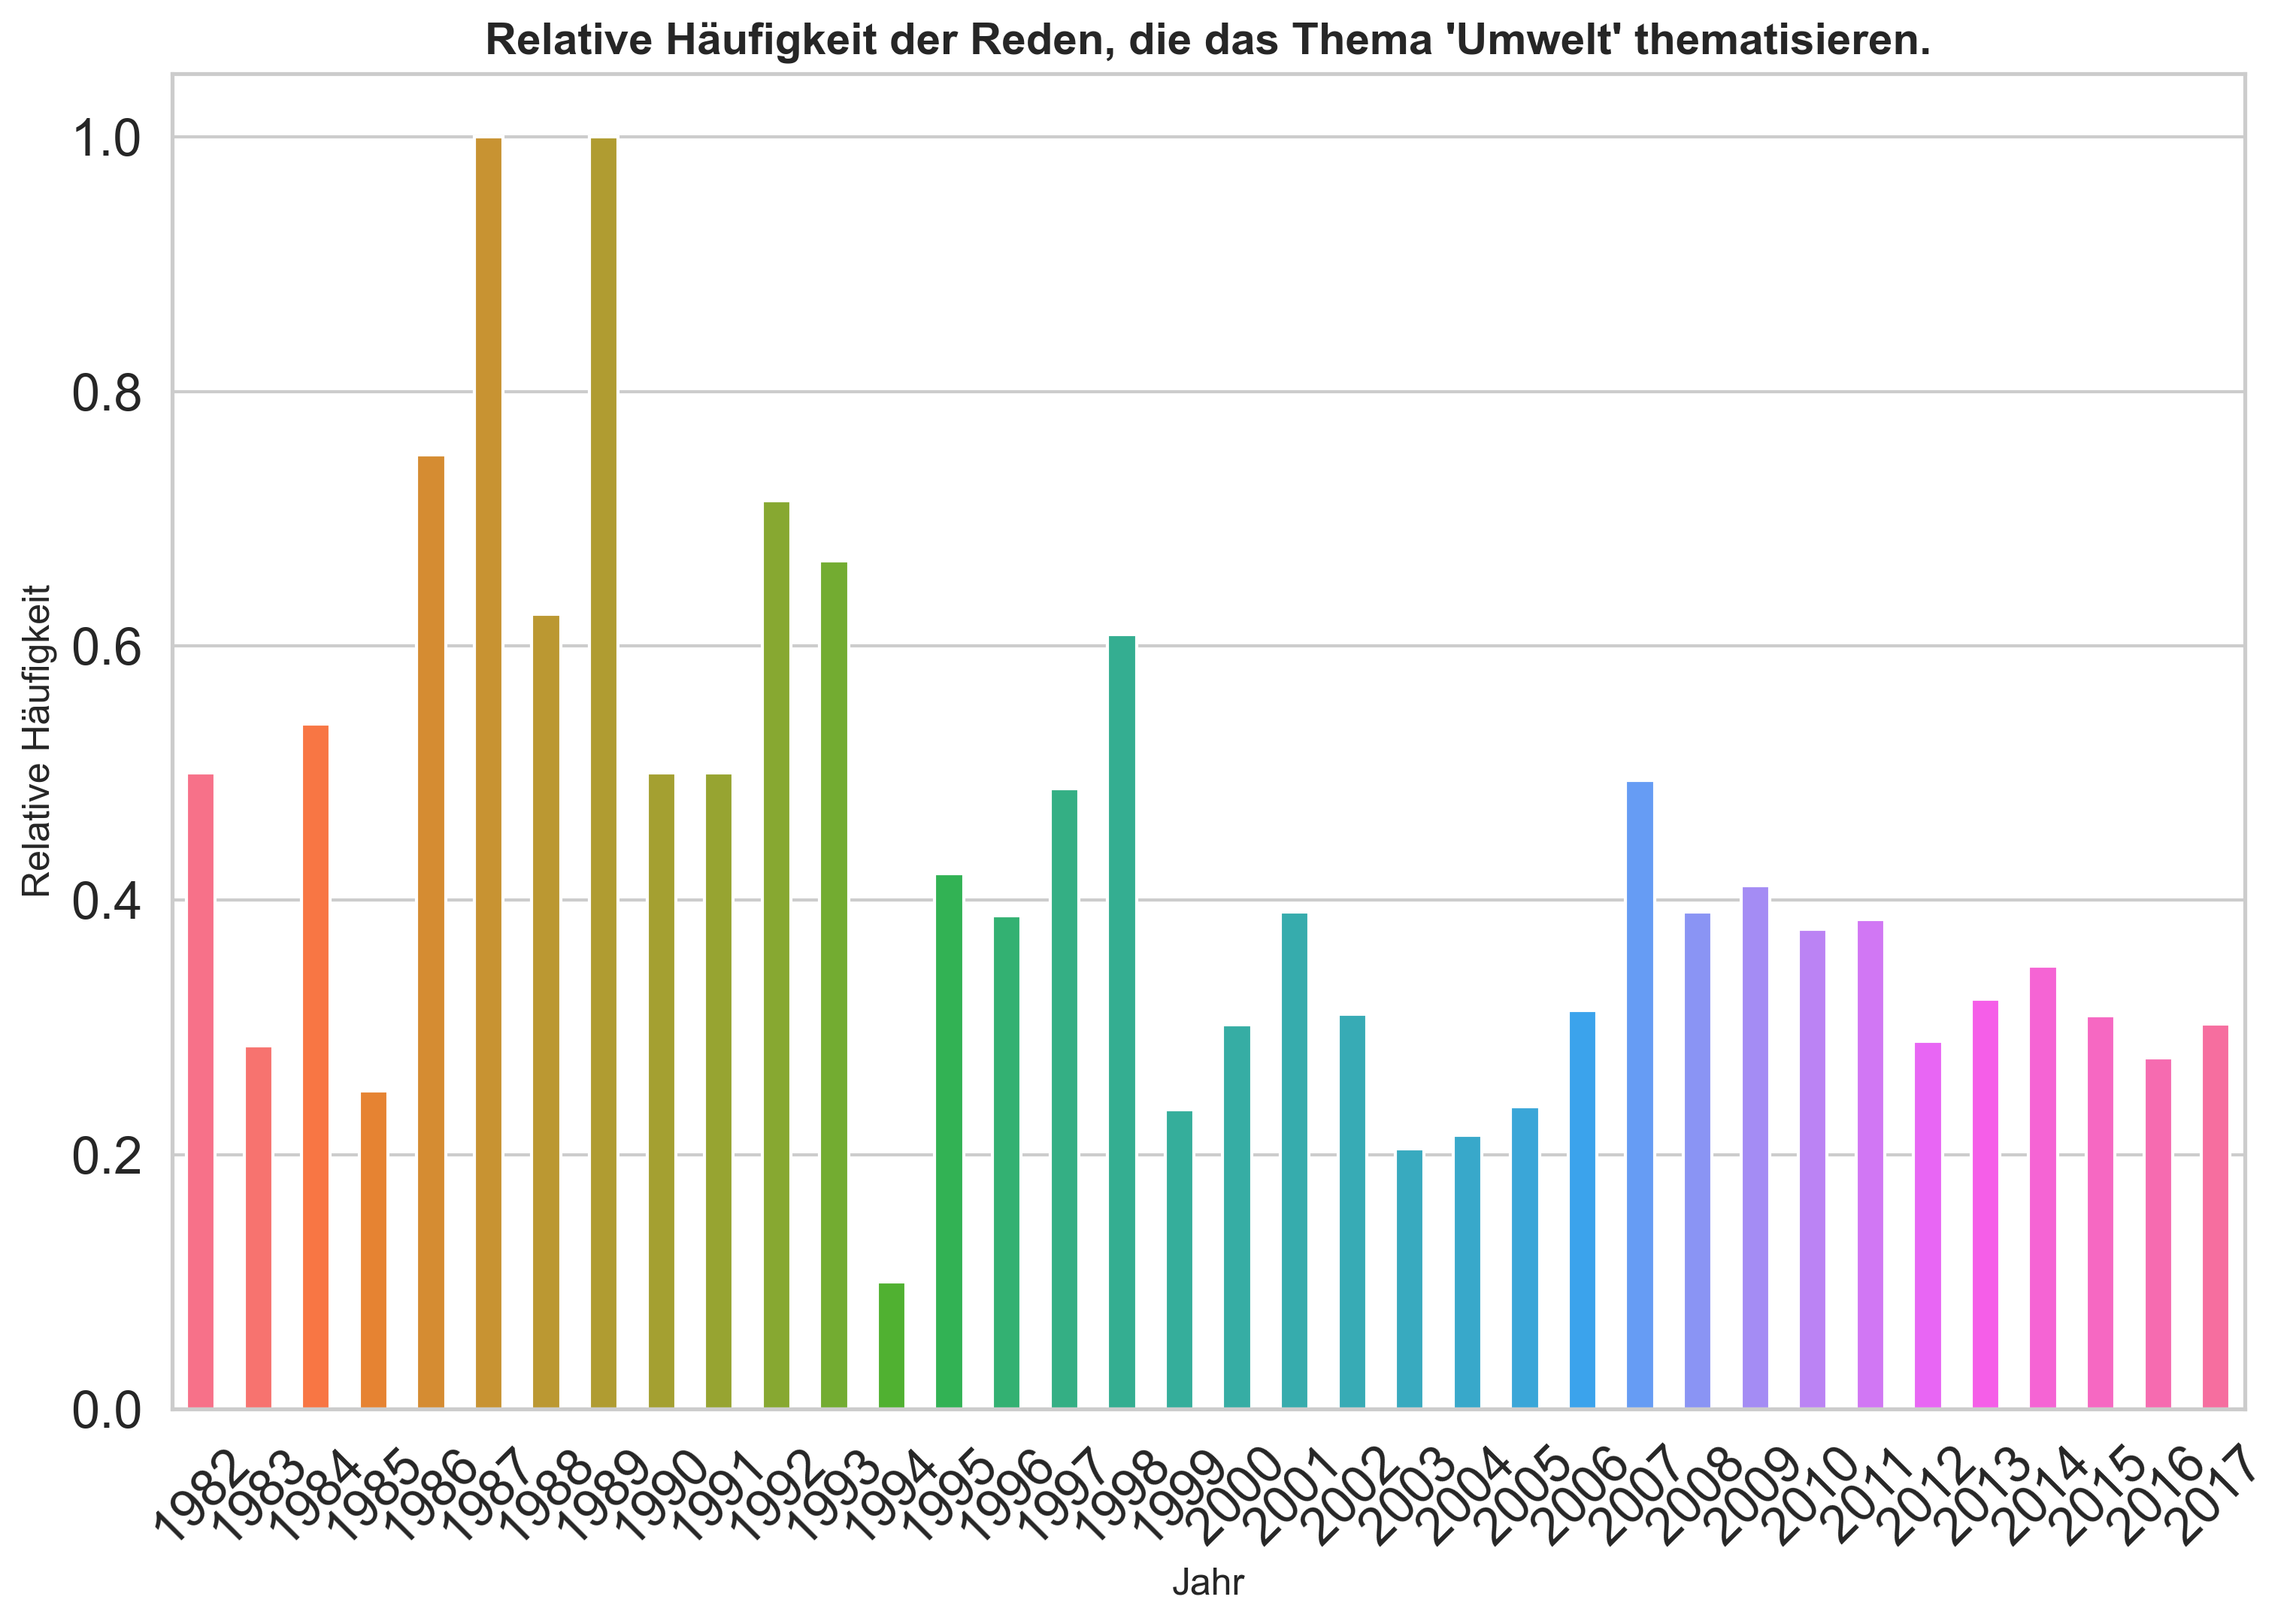

In [16]:
# Basisvisualisierung mit plt
plt.figure(figsize=(10, 7), dpi=300)

# Plotten der Daten
ratio_umwelt_to_total.plot.bar(color=sns.color_palette("husl", len(ratio_umwelt_to_total)))

# Styling des Layouts
plt.title("Relative Häufigkeit der Reden, die das Thema 'Umwelt' thematisieren.", fontweight="semibold", fontsize=14)
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Relative Häufigkeit", fontsize=12)
plt.xticks(rotation=45)  
plt.grid(False)  
plt.grid(True, axis="y")

plt.tight_layout(pad=0)
# plt.savefig("../daten/output/FILENAME.png")
plt.show()

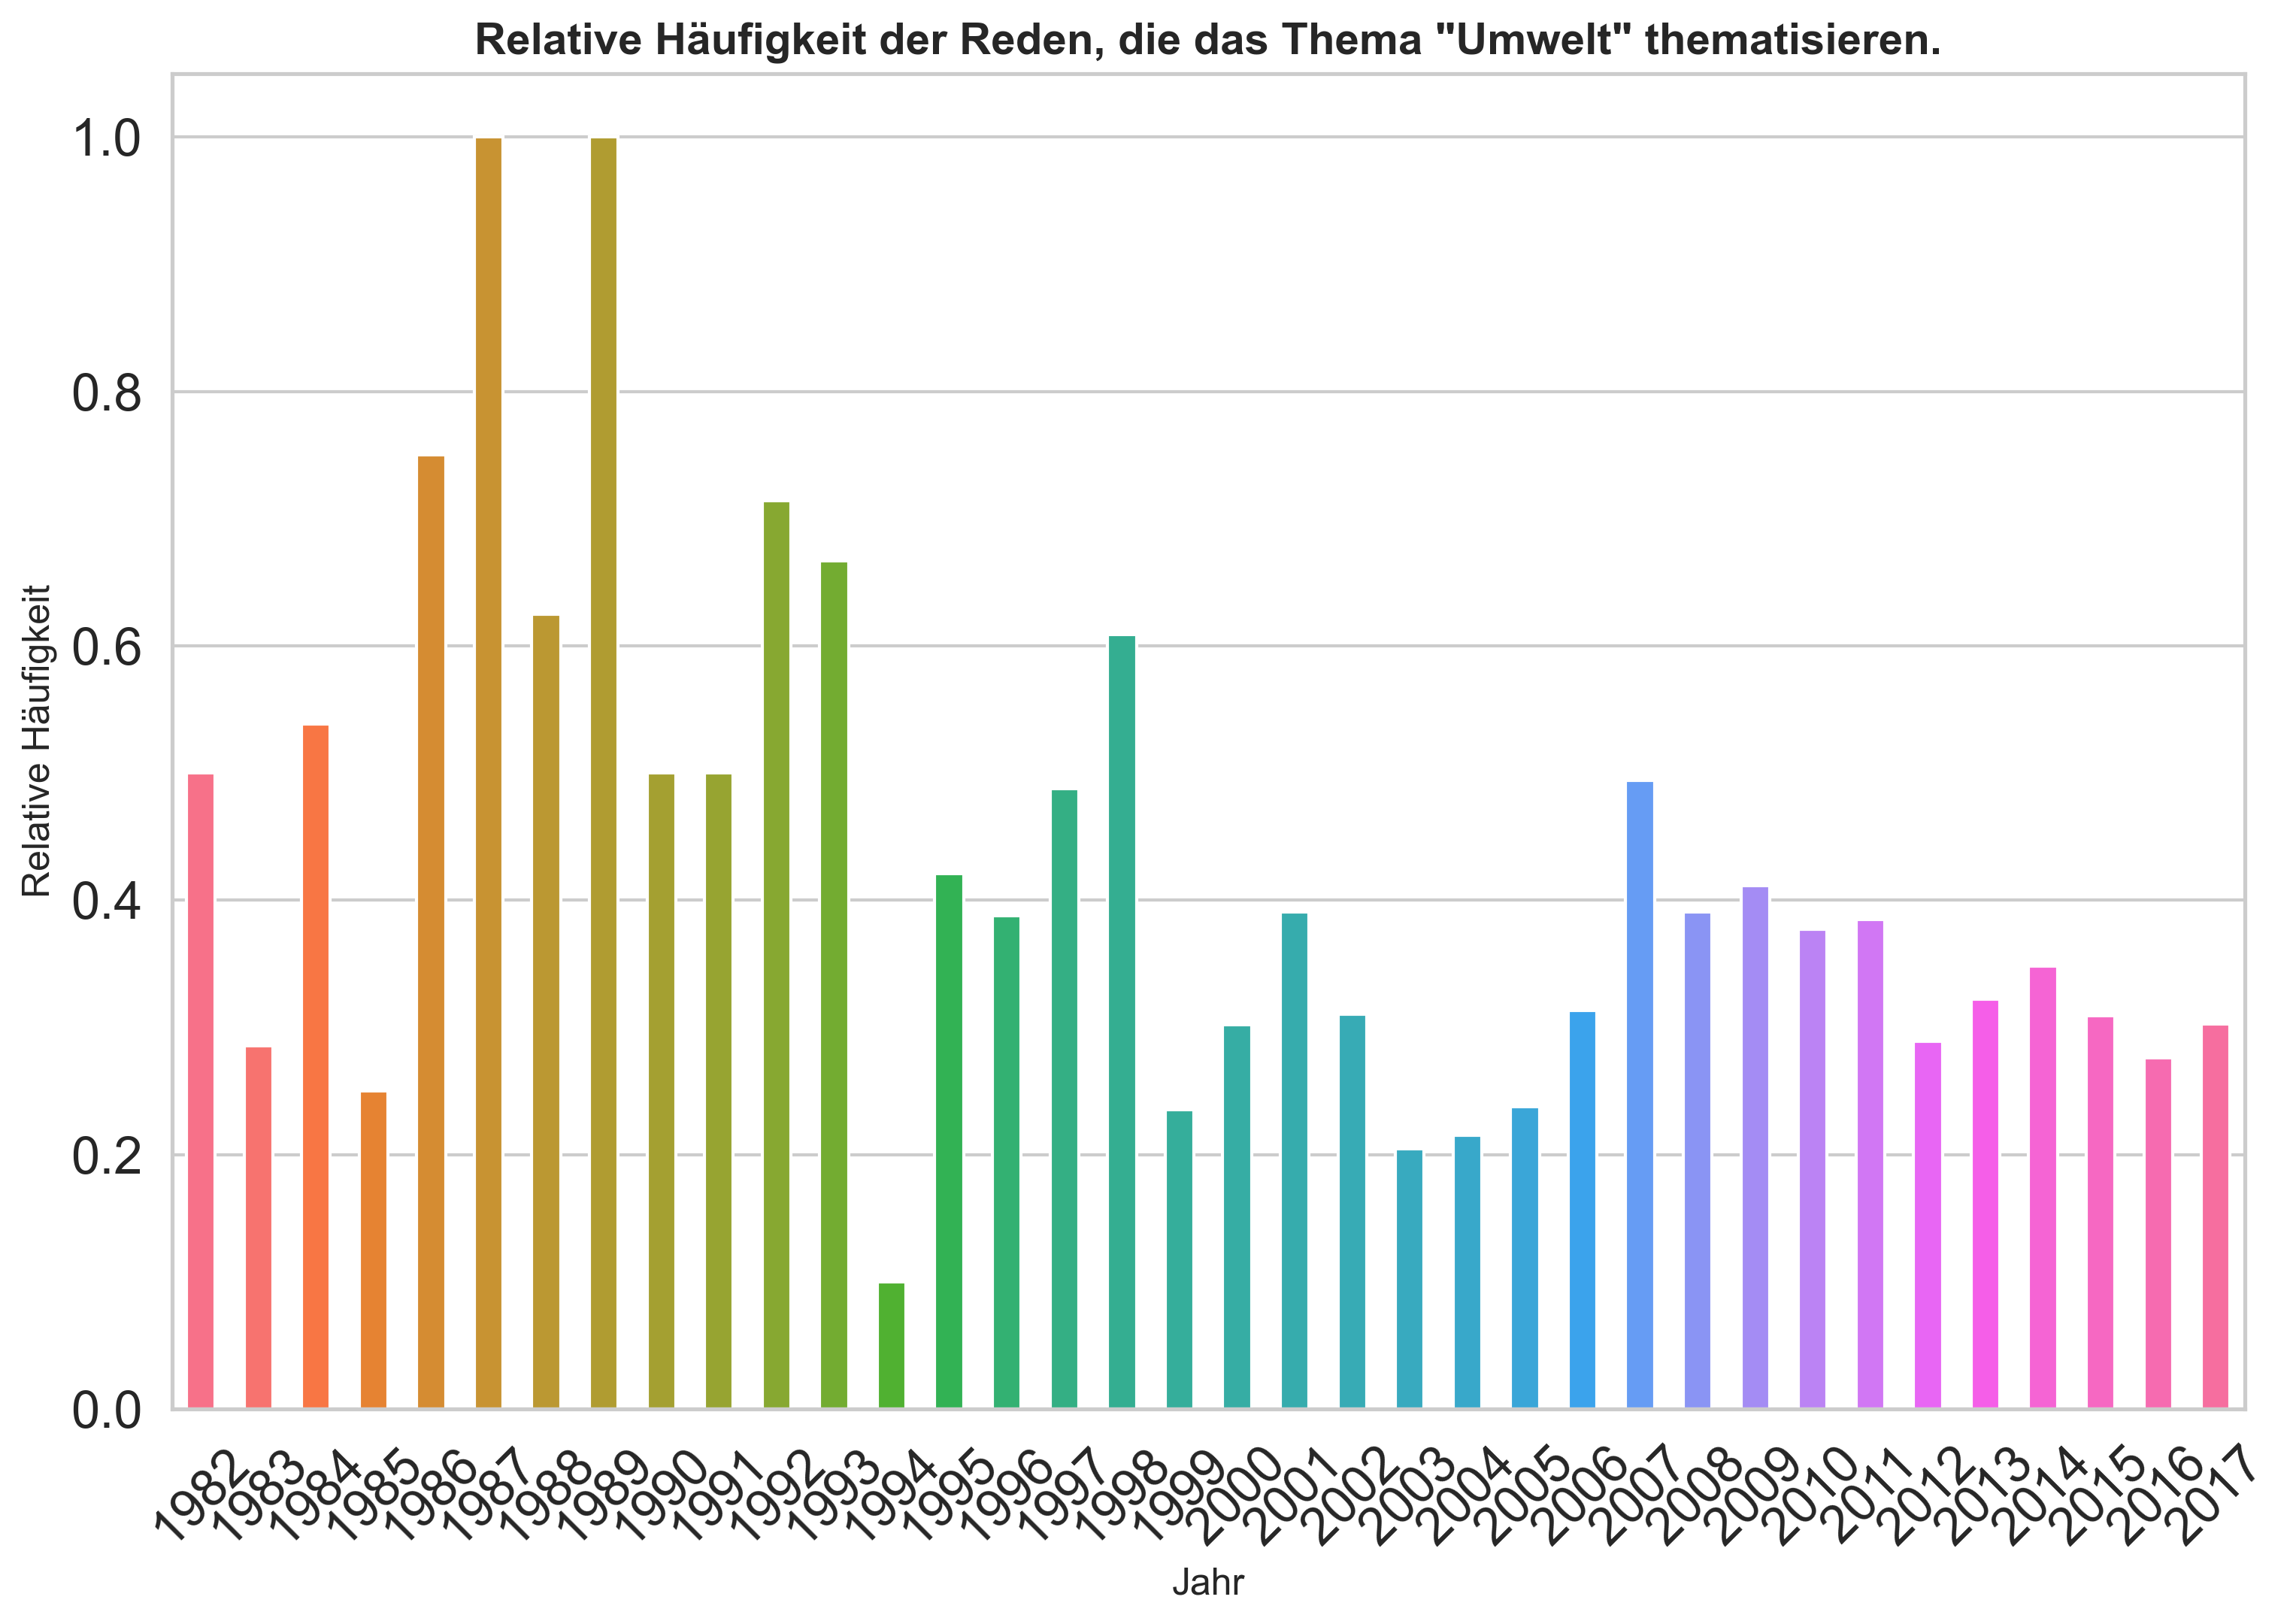

In [19]:
# Basisvisualisierung mit fig, ax
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)

# Plotten der Daten
ratio_umwelt_to_total.plot(kind='bar', 
                           color=sns.color_palette('husl', len(ratio_umwelt_to_total)))

# Styling des Layouts
ax.set_title('Relative Häufigkeit der Reden, die das Thema "Umwelt" thematisieren.', 
             fontweight='semibold', 
             fontsize=14)

ax.set_xlabel('Jahr', 
              fontsize=12)
ax.set_ylabel('Relative Häufigkeit', 
              fontsize=12)

ax.set_xticklabels(ratio_umwelt_to_total.index, rotation=45) 

ax.grid(False)  
ax.grid(True, axis='y')

plt.tight_layout(pad=0)
# plt.savefig("../daten/output/FILENAME.png")
plt.show()

## **Optionale Zusatzaufgabe:** Aufgabe 4 - Funktion für Visualisierung erstellen

Wie Sie sicherlich festgestellt haben, konnte der Code zur Visualisierung der Auswertungen im zweiten Teil dieses Notebook mit kleineren Anpassungen immer wieder verwendet werden, da die Art der zu visualisierenden Daten sich sehr ähneln. Das heißt, statt immer wieder den Code zu kopieren, könnte eigentlich, wie wir es gelernt haben, eine Funktion erstellt werden, die mit verschiedenen Parametern dann in unterschiedlichen Kontexten aufgerufen werden kann. 

Probieren Sie gerne einmal aus, wie der Code zur Visualisierung verallgemeinert werden müsste, damit er für die verschiedenen Aufgaben in diesem Notebook verwendet werden kann.

⏳ 20 Minuten

In [20]:
def visualize_as_bar(series_object, label_y, label_x, title):
    """Erstellt ein Balkendiagramm aus einem Pandas Series-Objekt

    Diese Funktion nimmt ein Pandas Series-Objekt und visualisiert es als Balkendiagramm 
    mit der Möglichkeit, die Beschriftungen der x- und y-Achse sowie den Titel des Diagramms anzupassen.
    Die Farben der Balken werden automatisch anhand der "husl"-Farbpalette von Seaborn generiert, 
    basierend auf der Anzahl der Elemente im Series-Objekt. Das kann auch noch über Parameter flexibler 
    gestaltet werden.

    Parameters:
    - series_object: Pandas Series-Objekt. Die Daten, die als Balkendiagramm visualisiert werden sollen
    - label_y (str): Die Beschriftung für die y-Achse des Diagramms
    - label_x (str): Die Beschriftung für die x-Achse des Diagramms
    - title (str): Der Titel des Diagramms

    Returns:
    - Ein Balkendiagramm, das die Daten im series_object visualisiert. Die Funktion gibt nichts zurück, 
      ruft aber plt.show() auf, um das Diagramm anzuzeigen."""


    plt.figure(figsize=(10, 7), dpi=300)

    # Plotten der Daten
    series_object.plot.bar(color=sns.color_palette("husl", len(series_object)))

    # Styling des Layouts
    plt.title(f"{title}", fontweight="semibold", fontsize=14)
    plt.xlabel(f"{label_x}", fontsize=12)
    plt.ylabel(f"{label_y}", fontsize=12)
    plt.xticks(rotation=45)  
    plt.grid(False)  
    plt.grid(True, axis="y")  

    plt.tight_layout(pad=0)
    return plt.show()

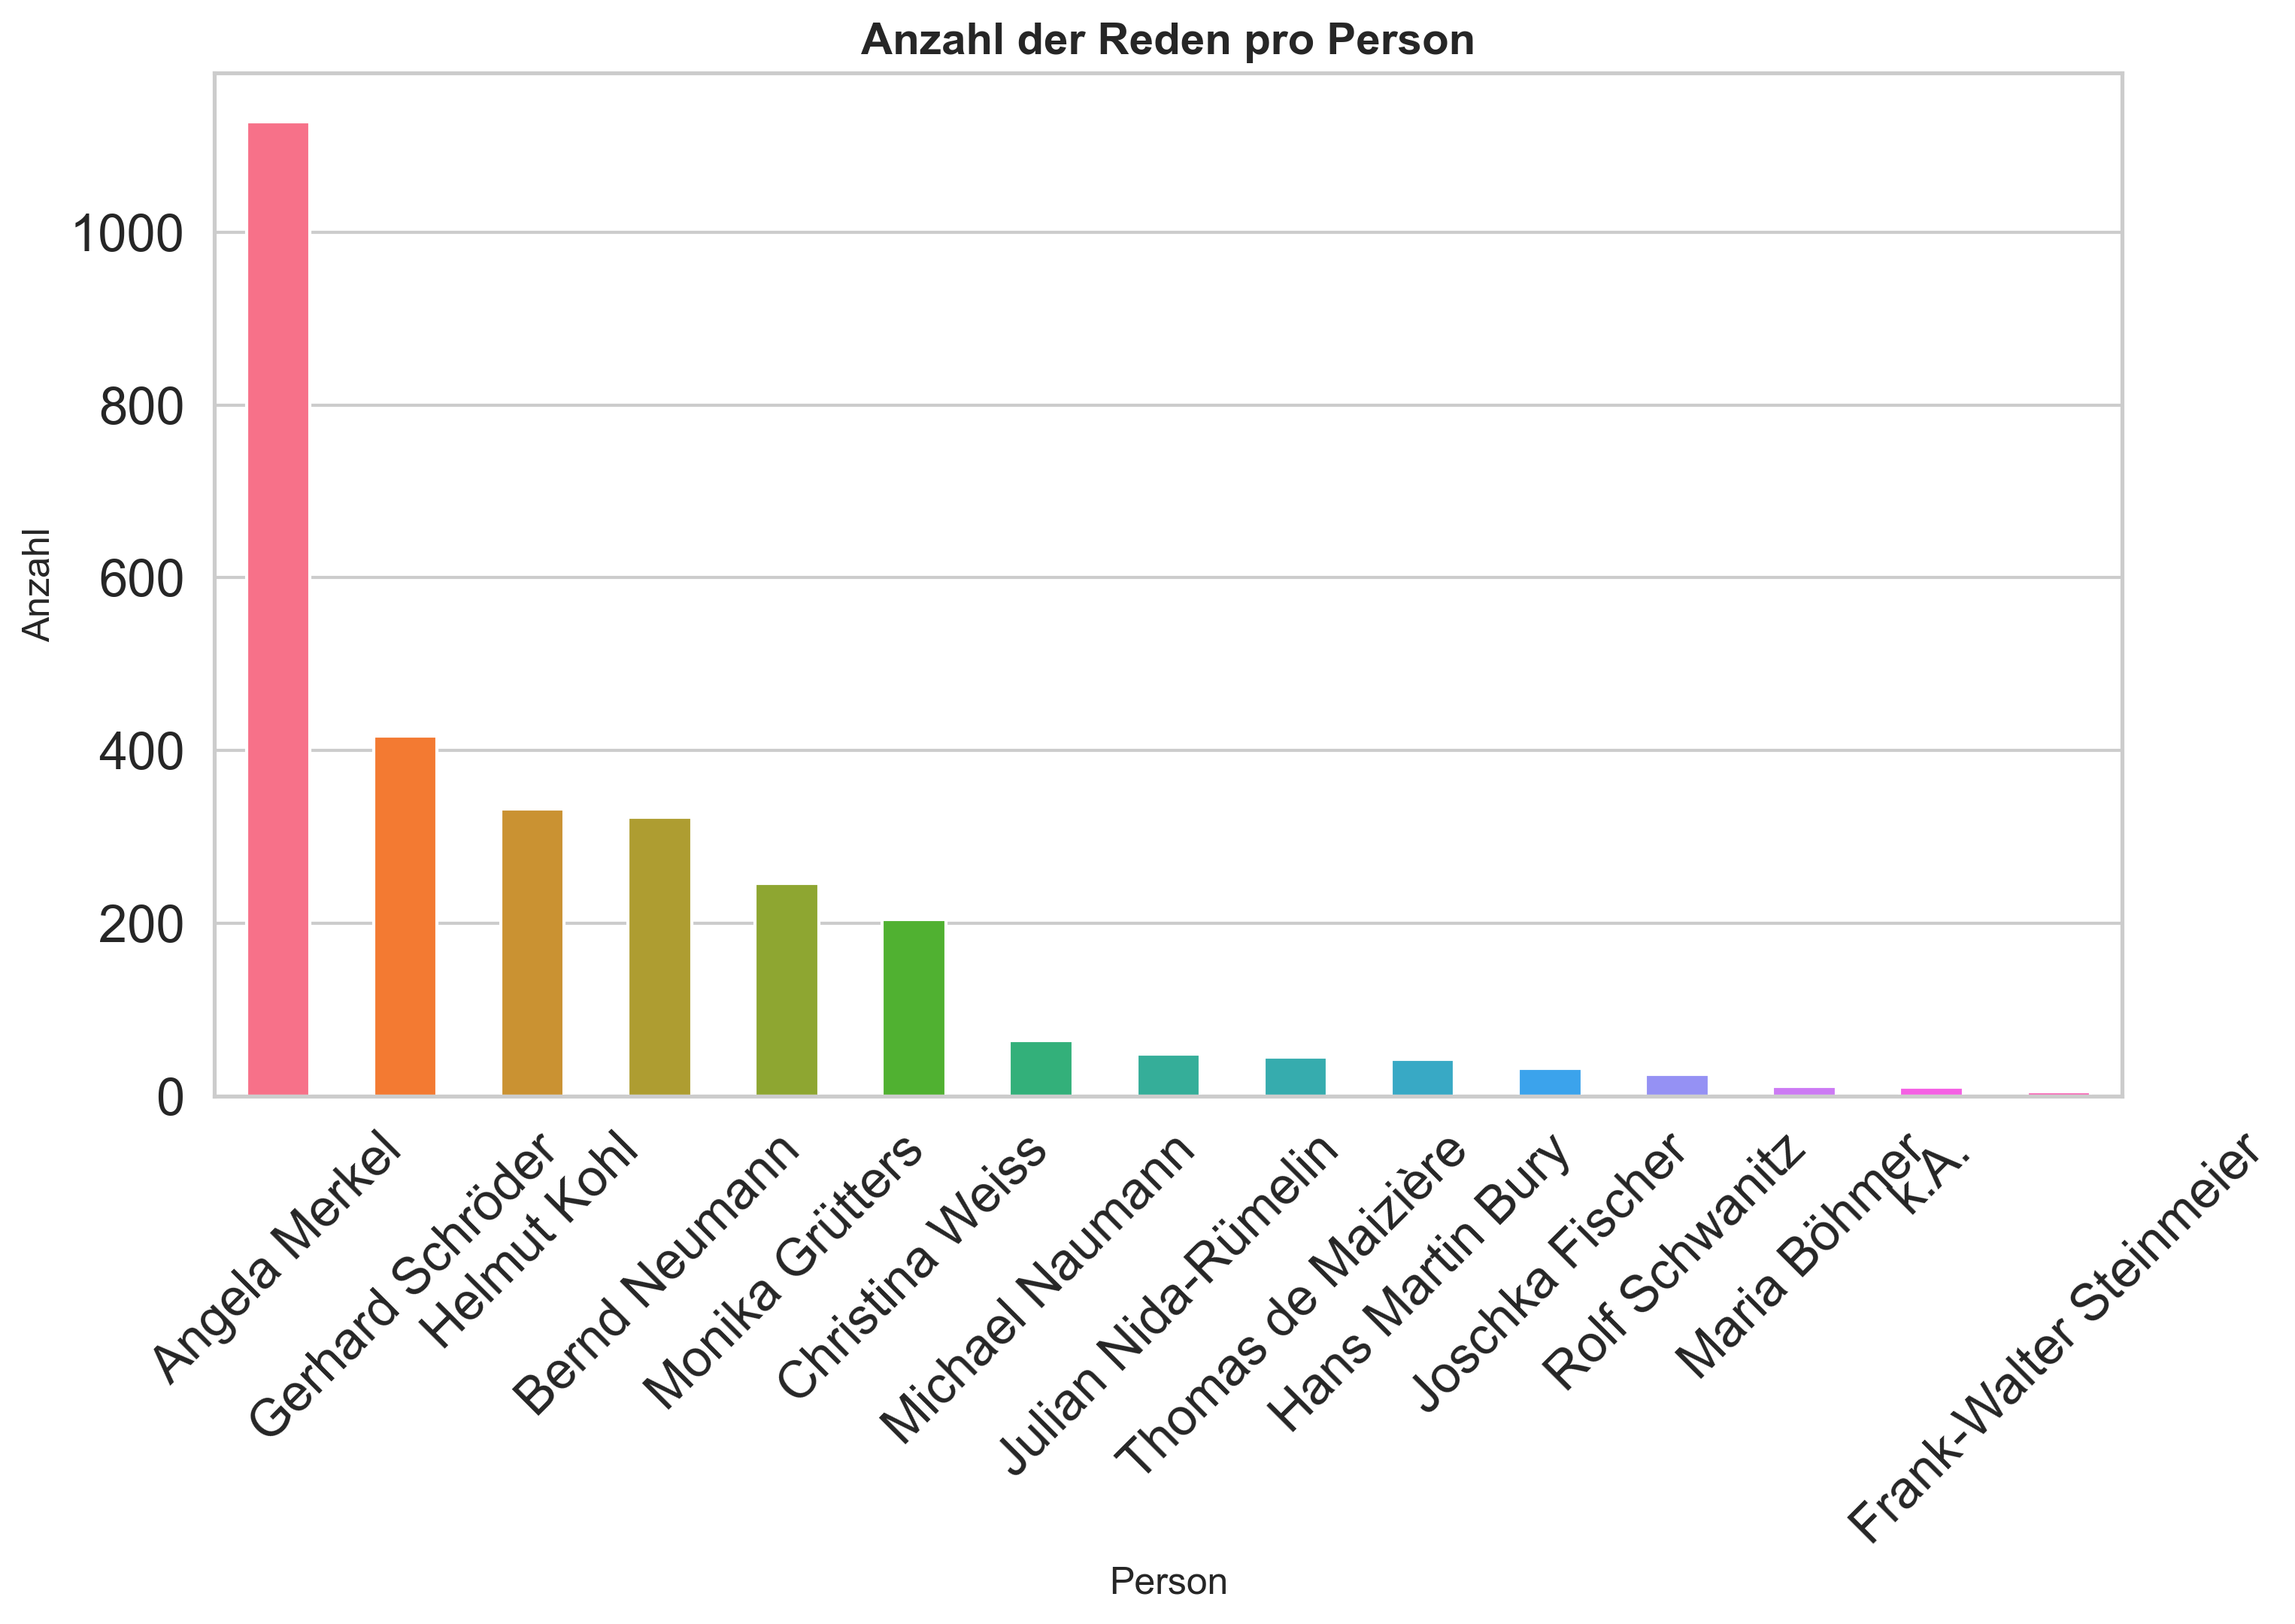

In [21]:
# test function #1
visualize_as_bar(person_counts[:15], "Anzahl", "Person", "Anzahl der Reden pro Person")

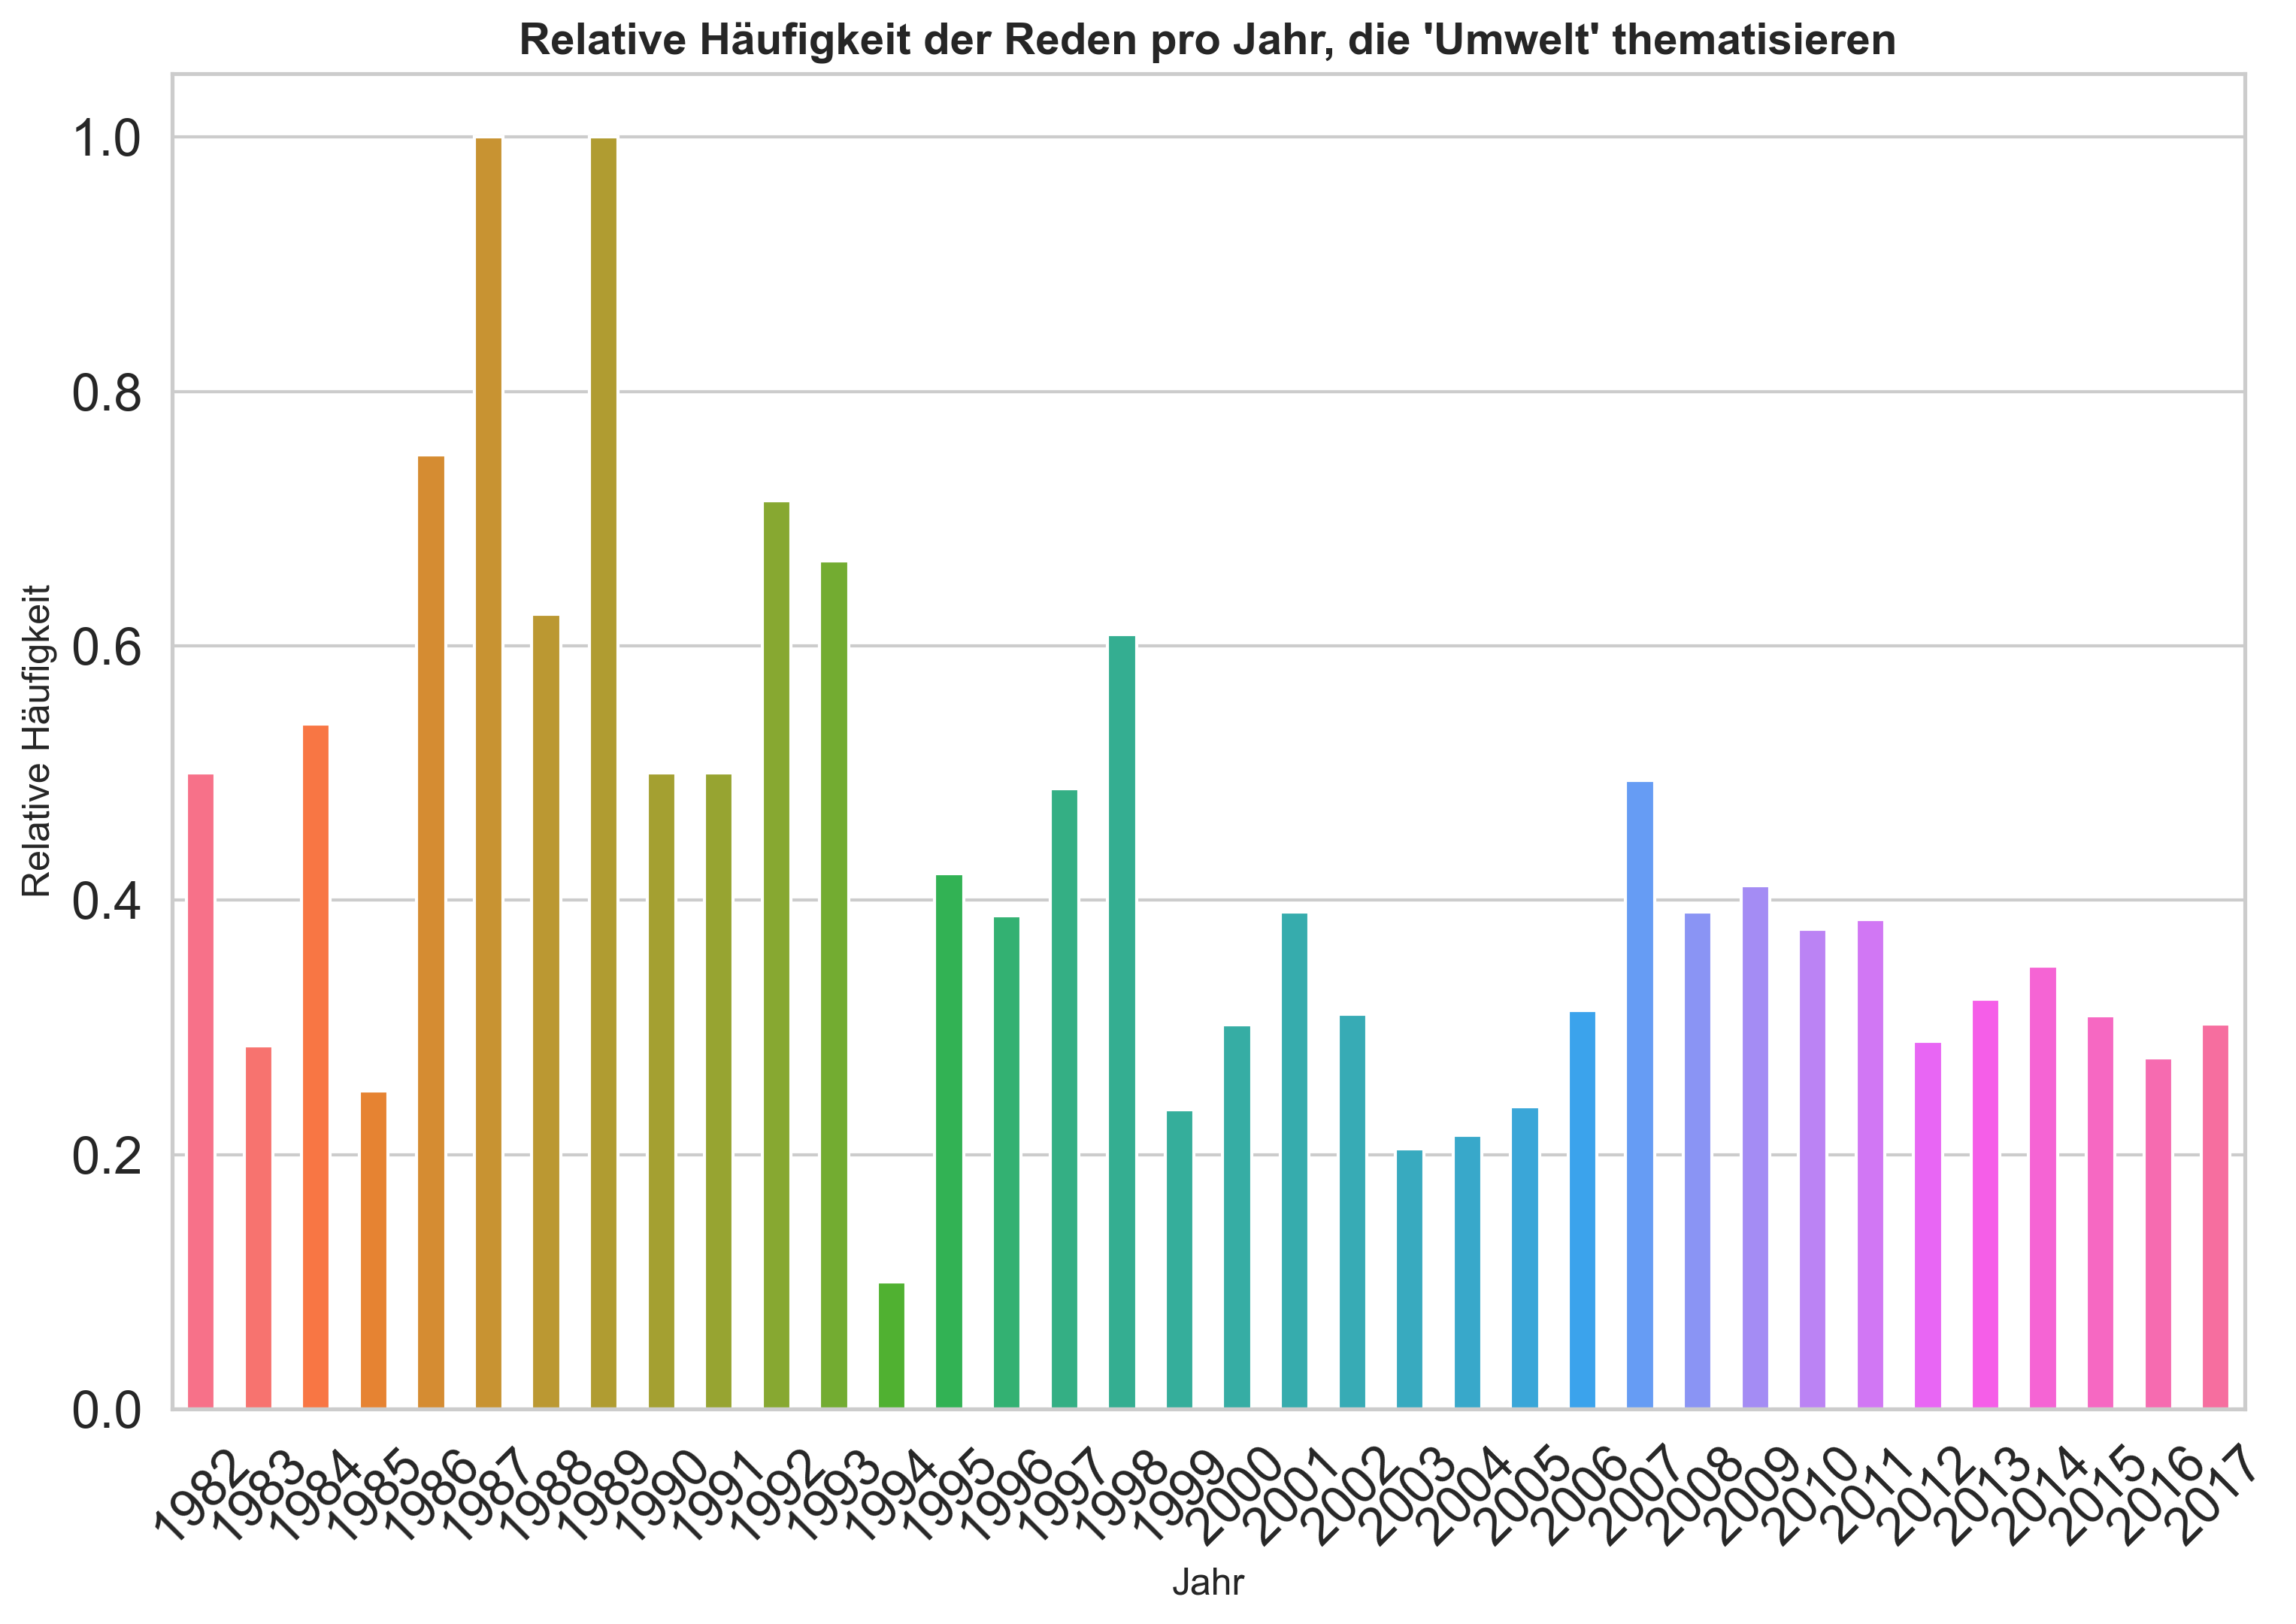

In [22]:
# test function #2
visualize_as_bar(ratio_umwelt_to_total, "Relative Häufigkeit", "Jahr", "Relative Häufigkeit der Reden pro Jahr, die 'Umwelt' thematisieren")

In [23]:
# Funktin mit fig, ax

def visualize_as_bar_v2(series_object, label_y, label_x, title):
    """Erstellt ein Balkendiagramm aus einem Pandas Series-Objekt

    Diese Funktion nimmt ein Pandas Series-Objekt und visualisiert es als Balkendiagramm 
    mit der Möglichkeit, die Beschriftungen der x- und y-Achse sowie den Titel des Diagramms anzupassen.
    Die Farben der Balken werden automatisch anhand der "husl"-Farbpalette von Seaborn generiert, 
    basierend auf der Anzahl der Elemente im Series-Objekt. Das kann auch noch über Parameter flexibler 
    gestaltet werden.

    Parameters:
    - series_object: Pandas Series-Objekt. Die Daten, die als Balkendiagramm visualisiert werden sollen
    - label_y (str): Die Beschriftung für die y-Achse des Diagramms
    - label_x (str): Die Beschriftung für die x-Achse des Diagramms
    - title (str): Der Titel des Diagramms

    Returns:
    - Ein Balkendiagramm, das die Daten im series_object visualisiert. Die Funktion gibt nichts zurück, 
      ruft aber plt.show() auf, um das Diagramm anzuzeigen."""


    fig, ax = plt.subplots(figsize=(10, 7), dpi=300)

    # Plotten der Daten
    series_object.plot(kind='bar',
                       color=sns.color_palette('husl', len(series_object)))

    # Styling des Layouts
    ax.set_title(f'{title}', fontweight='semibold', fontsize=14)
    ax.set_xlabel(f'{label_x}', fontsize=12)
    ax.set_ylabel(f'{label_y}', fontsize=12)
    ax.set_xticklabels(series_object.index, rotation=45)  
    ax.grid(False)  
    ax.grid(True, axis='y')  

    plt.tight_layout(pad=0)
    
    return plt.show()

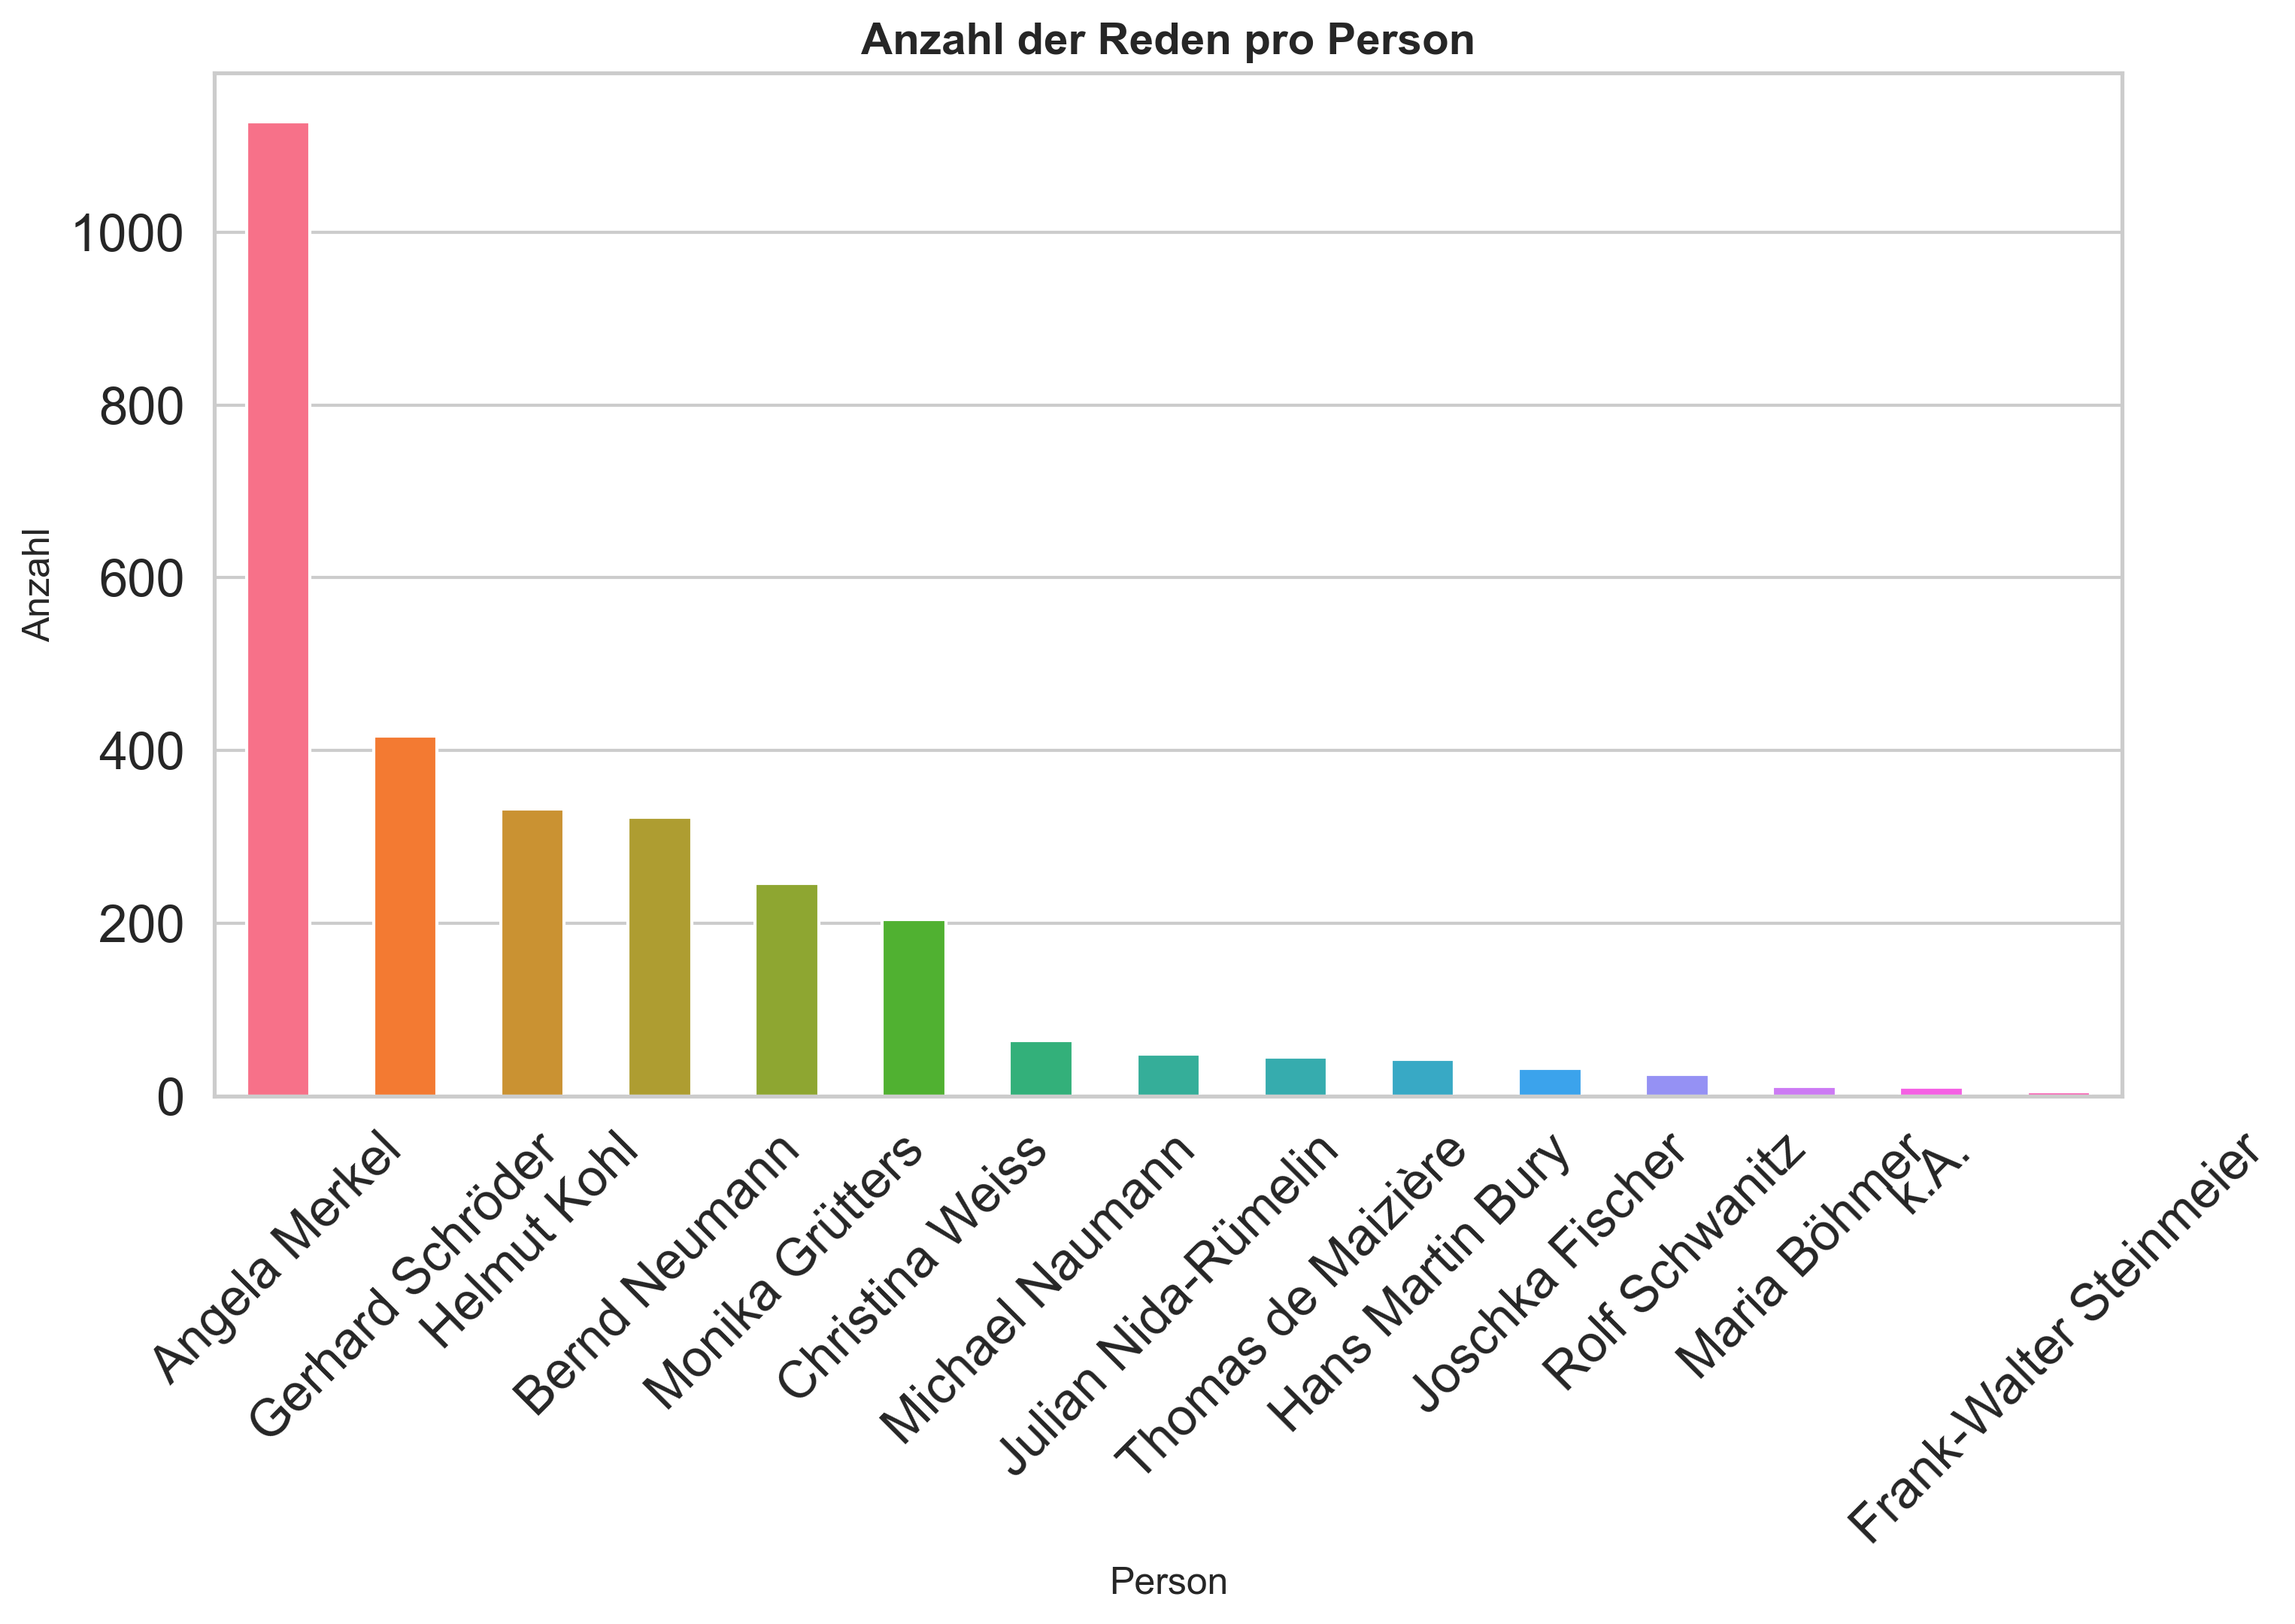

In [24]:
# test function #1
visualize_as_bar_v2(person_counts[:15], "Anzahl", "Person", "Anzahl der Reden pro Person")

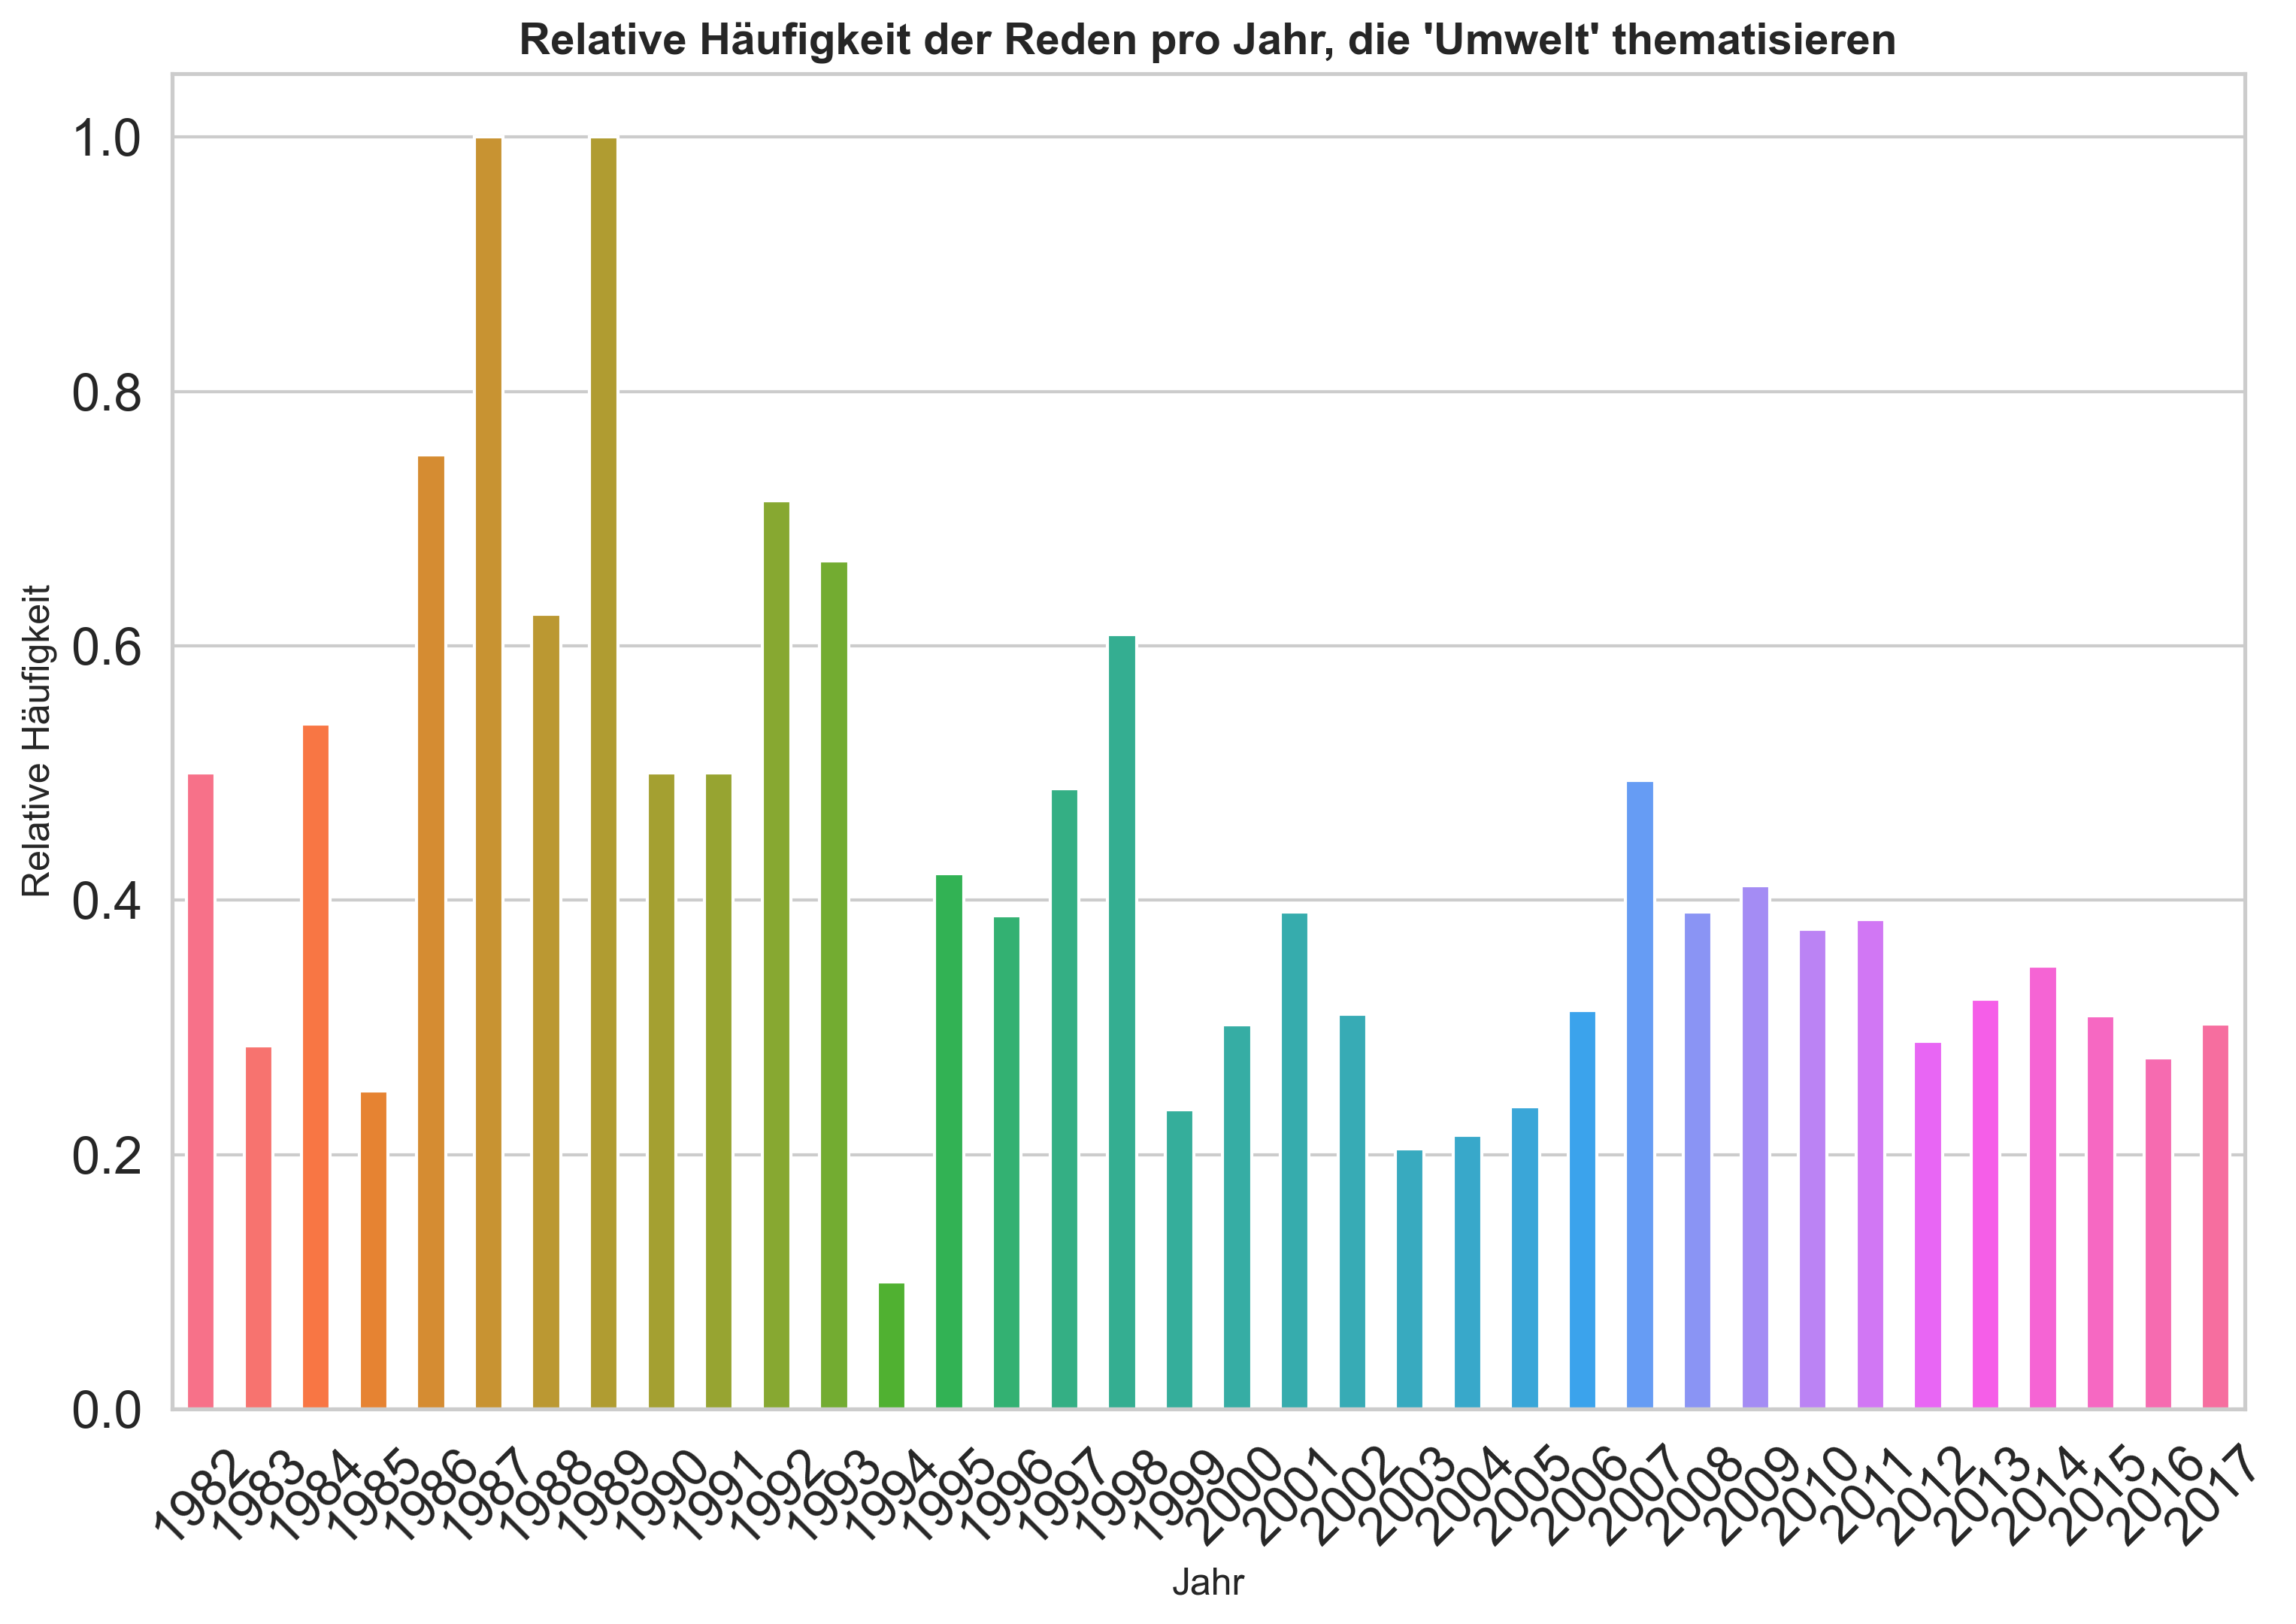

In [25]:
# test function #2
visualize_as_bar_v2(ratio_umwelt_to_total, "Relative Häufigkeit", "Jahr", "Relative Häufigkeit der Reden pro Jahr, die 'Umwelt' thematisieren")